<a href="https://colab.research.google.com/github/naga-kj/portfolio/blob/main/FinalCopy_Loan_Default_Prediction_Kolike01_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club - Loan Default Prediction**

**Problem Statement:**
*   The project's goal is to create a precise machine learning model for predicting loan default.
*   The objective is to detect high-risk borrowers and improve lenders' decision-making through the use of past loan data.
*    Feature engineering, model selection, and data quality assurance are all difficult tasks.
*   As a result of this project, lending institutions will experience reduced risk and more effective loan approval procedures, which will ultimately encourage responsible lending habits and financial stability.





**Type of machine learning:**
*   We're using supervised machine learning as we have the target attribute and some training data with known values for the target attribute.
*   It is a classification problem because the target is a category (yes(1) or no(0)) rather than a number.


# **Data Preparation**


*   Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


*   Loading the dataset

In [ ]:
# Load the dataset
data = pd.read_csv("./dataset_loan.csv")

**Understanding the data structure / Summary of the data**


*   Checking for the top-most rows

In [ ]:
data.head()

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0,65087372,10000,9253.764684,9253.764684,59,BAT2522922,11.140000,B,C4,...,2.498291,0.793724,7,INDIVIDUAL,156.843469,2,2434.091825,7565.908175,11452.249562,0
1,1,1450153,3609,3237.755453,3237.755453,59,BAT1586599,21.166814,C,D3,...,2.377215,0.974821,1,INDIVIDUAL,54.877211,0,1957.188506,1651.811494,7120.643357,0
2,2,1969101,28276,26243.319678,26243.319678,59,BAT2136391,10.787944,F,D4,...,4.316277,1.020075,1,INDIVIDUAL,444.802028,0,12075.307151,16200.692849,67248.183842,0
3,3,6651430,11170,10383.860151,10383.860151,59,BAT2428731,16.730000,C,C3,...,0.107020,0.749971,6,INDIVIDUAL,175.997630,3,4568.572505,6601.427495,32236.762749,1
4,4,14354669,16890,16596.842701,16596.842701,59,BAT5341619,11.840616,C,D4,...,1294.818751,0.368953,1,INDIVIDUAL,281.302419,0,11422.265816,5467.734184,35654.386749,0


*   Checking for the bottom-most rows

In [ ]:
data.tail()

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,67458,16164945,13601,13571.438122,13571.438122,59,BAT3193689,20.750143,C,A4,...,564.614852,0.865230,1,INDIVIDUAL,230.024375,0,3373.382583,10227.617417,32887.962301,0
67459,67459,35182714,8323,7792.827995,7792.827995,59,BAT1780517,18.698880,C,B3,...,2.015494,1.403368,1,INDIVIDUAL,132.081830,0,1820.878505,6502.121495,23862.552284,1
67460,67460,16435904,15897,14760.778346,14760.778346,59,BAT1761981,12.004233,A,F3,...,5.673092,1.607093,1,INDIVIDUAL,250.182684,0,11116.959545,4780.040455,43088.811109,0
67461,67461,5300325,16567,15914.066683,15914.066683,59,BAT2333412,22.666046,D,E3,...,1.157454,0.207608,1,INDIVIDUAL,269.729944,0,9935.177387,6631.822613,19472.849971,0
67462,67462,65443173,15353,15297.191915,15297.191915,59,BAT1930365,9.189236,B,D1,...,1.856480,0.366386,1,INDIVIDUAL,259.274439,0,9763.132279,5589.867721,31012.820154,0



*   Summarize basic statistical data

In [ ]:
data.describe()

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employee Income,Debit to Income,Delinquency - two years,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,33731.000000,2.562761e+07,16848.902776,15924.593772,15924.593772,58.173814,16.573023,80541.502549,20.725649,0.334524,...,20.279425,59.691578,1.125141,1.477091,275.113810,0.469620,6756.900733,10092.002044,33730.268869,0.284778
std,19475.034942,2.109155e+07,8367.865726,7931.007990,7931.007990,3.327441,5.792368,45029.120371,8.424437,1.211673,...,16.974551,357.026346,3.489885,1.092640,139.577899,1.347263,4688.639567,5973.583027,19935.798338,0.451312
min,0.000000,1.297933e+06,1014.000000,936.176404,936.176404,36.000000,5.320000,14573.540000,1.300000,0.000000,...,0.208171,0.000036,0.000036,0.000000,15.867397,0.000000,112.057092,327.746164,1092.603979,0.000000
25%,16865.500000,6.570288e+06,10012.000000,9465.023933,9465.023933,58.000000,11.767132,51689.845000,14.038354,0.000000,...,7.857817,1.629818,0.476259,1.000000,162.678922,0.000000,3091.241484,5457.787890,18245.100787,0.000000
50%,33731.000000,1.791565e+07,16073.000000,15200.041561,15200.041561,59.000000,16.143078,69335.830000,19.823614,0.000000,...,15.271995,3.344524,0.780141,1.000000,260.818691,0.000000,5619.995997,9057.524904,30332.621815,0.000000
75%,50596.500000,4.271521e+07,22106.000000,20984.654226,20984.654226,59.000000,20.874404,94623.320000,25.669587,0.000000,...,27.704209,5.453727,1.070566,2.000000,362.541929,0.000000,9433.512094,13547.235001,45345.000179,1.000000
max,67462.000000,7.224578e+07,35000.000000,34900.571451,34900.571451,59.000000,36.991170,406561.540000,42.998326,8.000000,...,120.137411,4354.467419,166.833000,7.000000,959.406505,6.000000,24471.297003,31156.576559,104515.279065,1.000000


*   There are 67463 distinct loan applicants.
*   The average value for the loan amount is 16848.9.(Loan Amount)
*   The term duration is minimum 36 months and maximum 59 months. (Term)
*   As the value 0 for 'non default' and value 1 means 'default', the mean of 0.291923 means that there are 29.19 % of customers that will default (will verify this in the next sections of this analysis).

**Data Pre-processing / Cleaning**


*   **Dealing with missing values**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0                      0
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Employee Income                 0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilization Rate      0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    


*   No missing and null values found.


*   **Inspecting duplicates**

In [ ]:
# Remove Duplicates
# Check for duplicates
duplicates_before_removal = data.duplicated()
print("Number of duplicate rows:", duplicates_before_removal.sum())


Number of duplicate rows: 0



*   No duplicates found.


*   **Inspecting the data types of the varaibles**


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    67463 non-null  int64  
 1   ID                            67463 non-null  int64  
 2   Loan Amount                   67463 non-null  int64  
 3   Funded Amount                 67463 non-null  float64
 4   Funded Amount Investor        67463 non-null  float64
 5   Term                          67463 non-null  int64  
 6   Batch Enrolled                67463 non-null  object 
 7   Interest Rate                 67463 non-null  float64
 8   Grade                         67463 non-null  object 
 9   Sub Grade                     67463 non-null  object 
 10  Home Ownership                67463 non-null  object 
 11  Employee Income               67463 non-null  float64
 12  Verification Status           67463 non-null  object 
 13  P


The dataset does not have any missing values. Besides that it does not have any duplicate rows. The above code cleans the data. The process of cleaning includes removal of outliers, as well as non relevant columns like "Payment Plan" ,"ID","Batch Enrolled","Verification Status".

*   **Dropping few unecessary columns from the dataframe.**


*   Renaming few variables for better readability

In [ ]:
data.rename({'Debit to Income':'Debt to Income Ratio',
             'Loan Status': 'Default/Non Default'}, axis=1, inplace=True)
data

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Default/Non Default
0,0,65087372,10000,9253.764684,9253.764684,59,BAT2522922,11.140000,B,C4,...,2.498291,0.793724,7,INDIVIDUAL,156.843469,2,2434.091825,7565.908175,11452.249562,0
1,1,1450153,3609,3237.755453,3237.755453,59,BAT1586599,21.166814,C,D3,...,2.377215,0.974821,1,INDIVIDUAL,54.877211,0,1957.188506,1651.811494,7120.643357,0
2,2,1969101,28276,26243.319678,26243.319678,59,BAT2136391,10.787944,F,D4,...,4.316277,1.020075,1,INDIVIDUAL,444.802028,0,12075.307151,16200.692849,67248.183842,0
3,3,6651430,11170,10383.860151,10383.860151,59,BAT2428731,16.730000,C,C3,...,0.107020,0.749971,6,INDIVIDUAL,175.997630,3,4568.572505,6601.427495,32236.762749,1
4,4,14354669,16890,16596.842701,16596.842701,59,BAT5341619,11.840616,C,D4,...,1294.818751,0.368953,1,INDIVIDUAL,281.302419,0,11422.265816,5467.734184,35654.386749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,67458,16164945,13601,13571.438122,13571.438122,59,BAT3193689,20.750143,C,A4,...,564.614852,0.865230,1,INDIVIDUAL,230.024375,0,3373.382583,10227.617417,32887.962301,0
67459,67459,35182714,8323,7792.827995,7792.827995,59,BAT1780517,18.698880,C,B3,...,2.015494,1.403368,1,INDIVIDUAL,132.081830,0,1820.878505,6502.121495,23862.552284,1
67460,67460,16435904,15897,14760.778346,14760.778346,59,BAT1761981,12.004233,A,F3,...,5.673092,1.607093,1,INDIVIDUAL,250.182684,0,11116.959545,4780.040455,43088.811109,0
67461,67461,5300325,16567,15914.066683,15914.066683,59,BAT2333412,22.666046,D,E3,...,1.157454,0.207608,1,INDIVIDUAL,269.729944,0,9935.177387,6631.822613,19472.849971,0


'Batch Enrolled', 'ID', 'Payment Plan', 'Sub Grade','Verification Status' variables/columns are being dropped.

In [ ]:
data.drop(['Batch Enrolled', 'ID', 'Payment Plan',"Verification Status","Sub Grade",'Unnamed: 0'], axis=1,inplace=True)

# **Exploratory Data Analysis**


*   **Univariate Analysis**





**1.**   **Histogram & Box plots**




The below code conducts univariate analysis on numeric features in the dataset. For each numeric column, it generates two visualizations: a histogram and a box plot. The histogram displays the distribution of the data, including the shape and spread, while the box plot reveals the presence of outliers and the distribution's central tendency. These visualizations help in understanding the characteristics and potential issues within the numeric variables, aiding in the exploratory data analysis process.

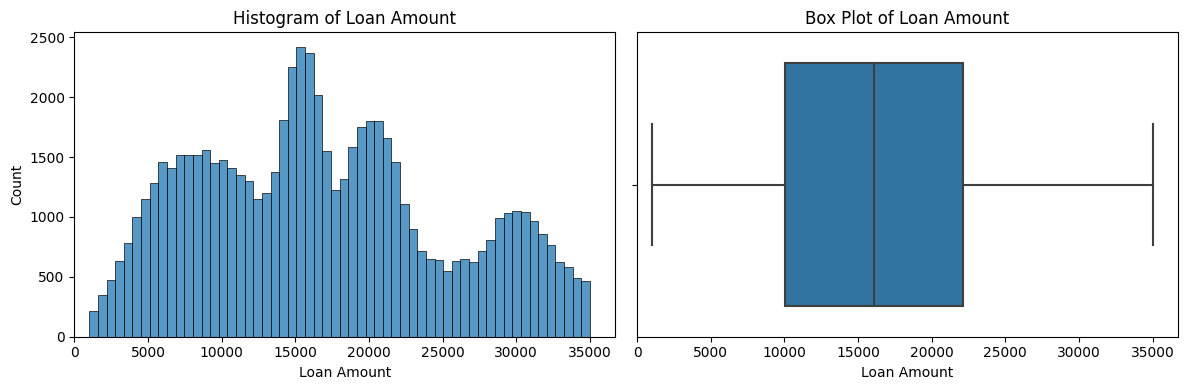

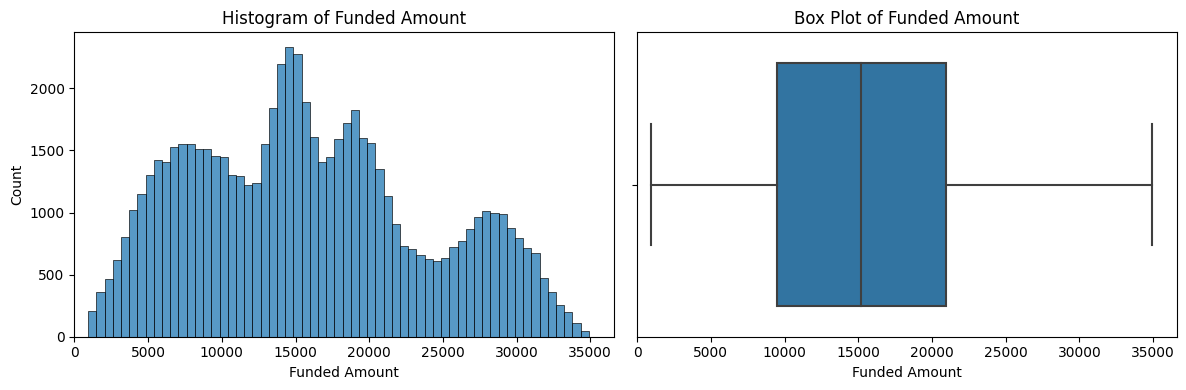

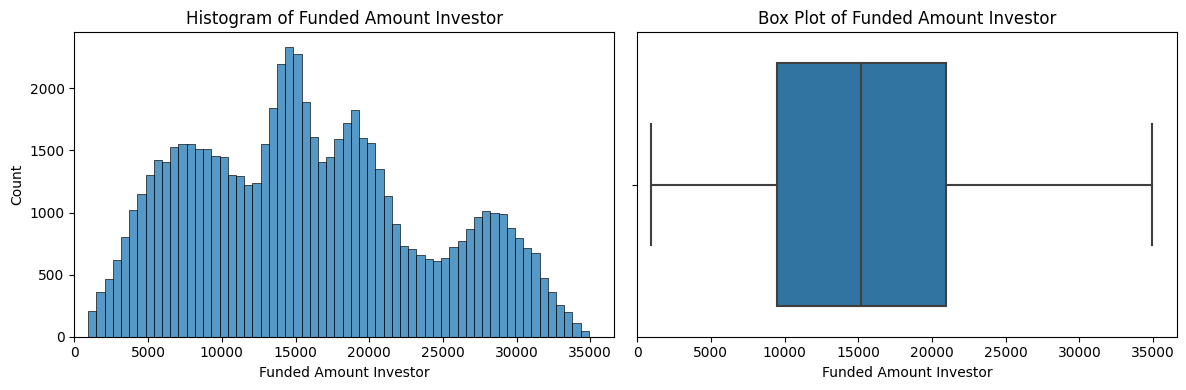

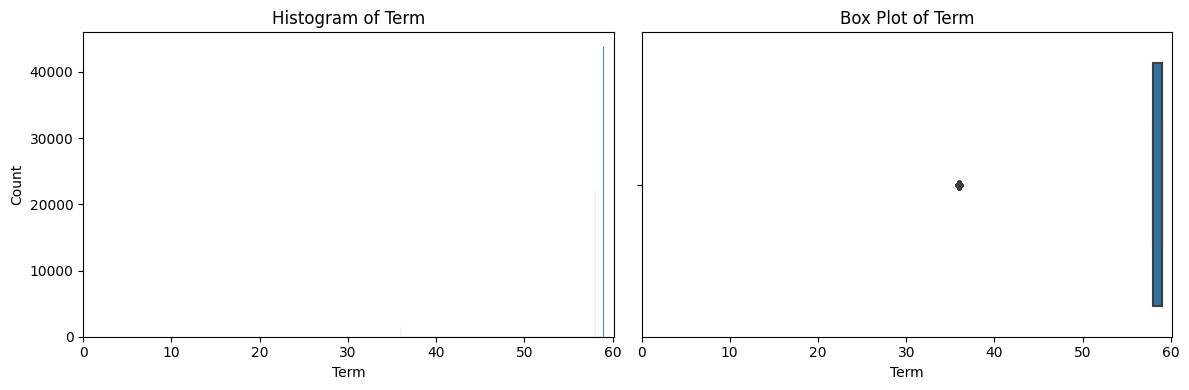

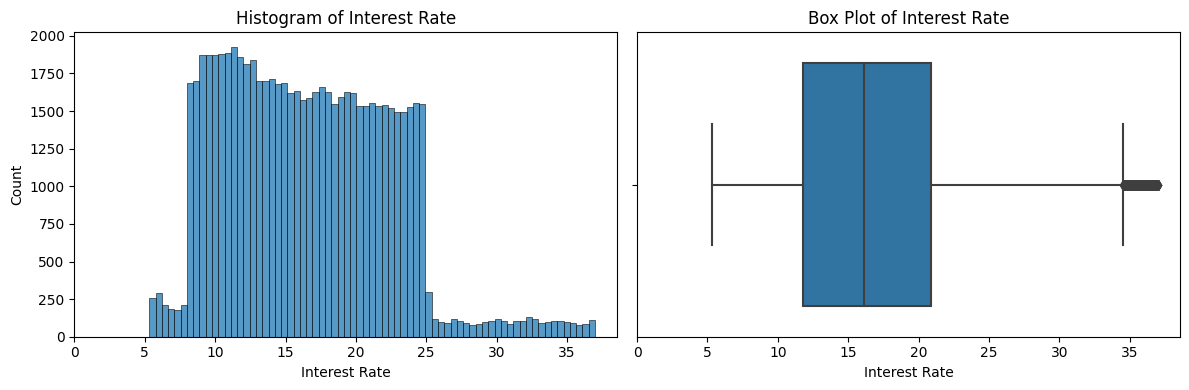

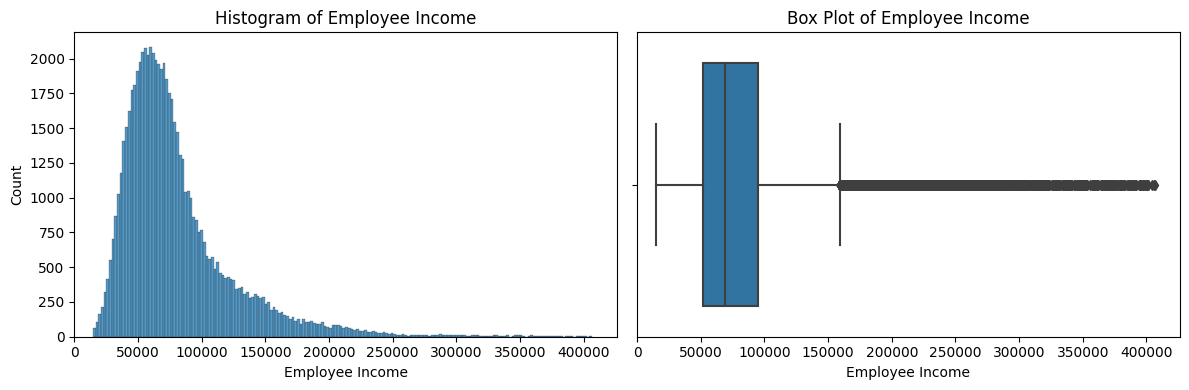

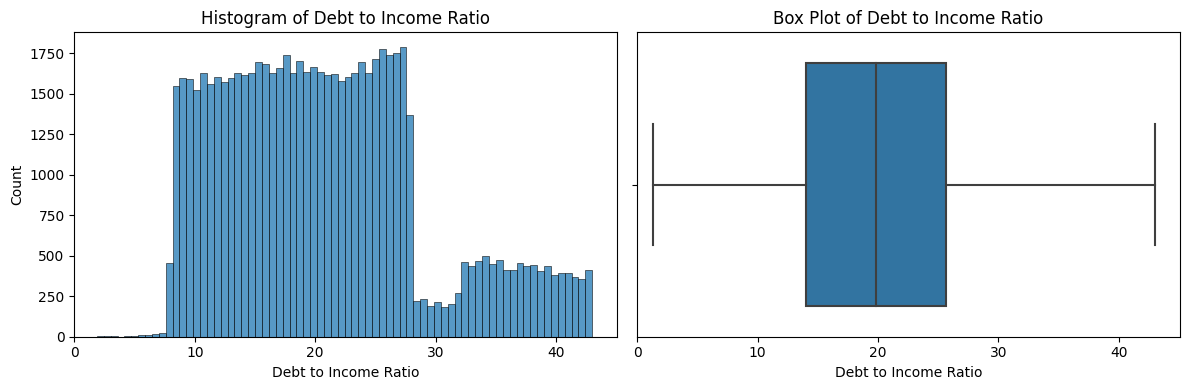

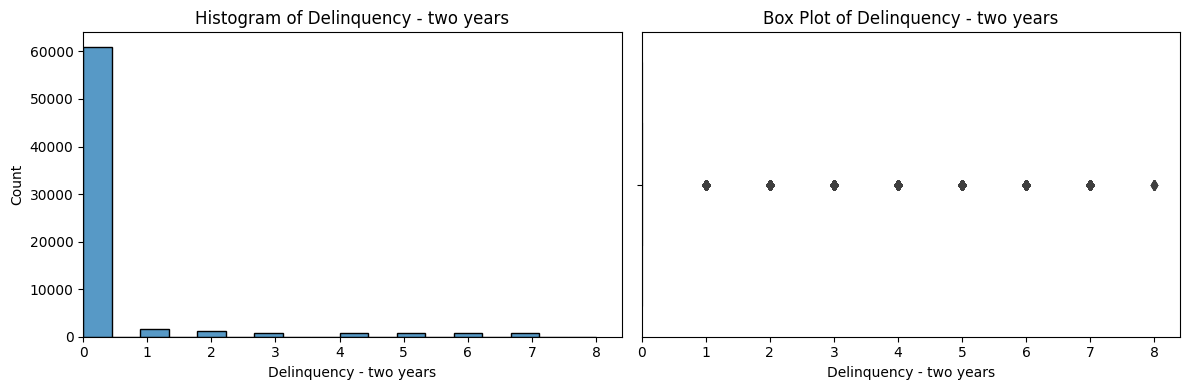

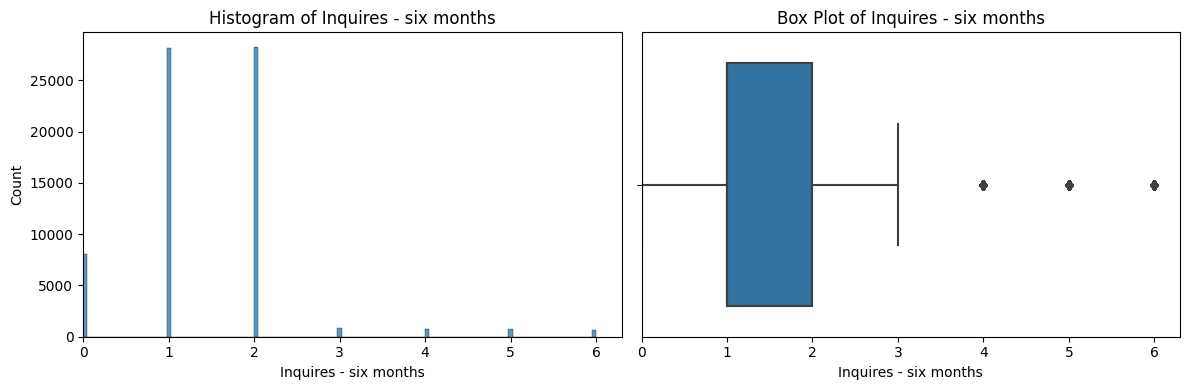

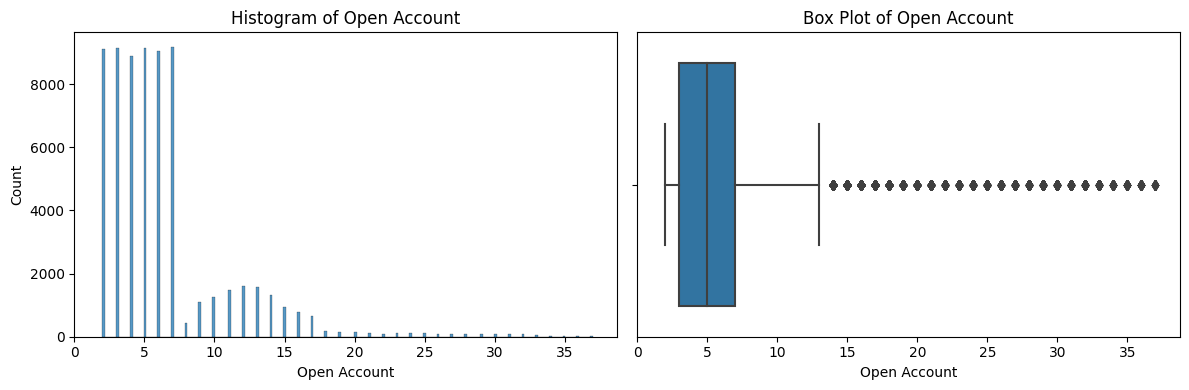

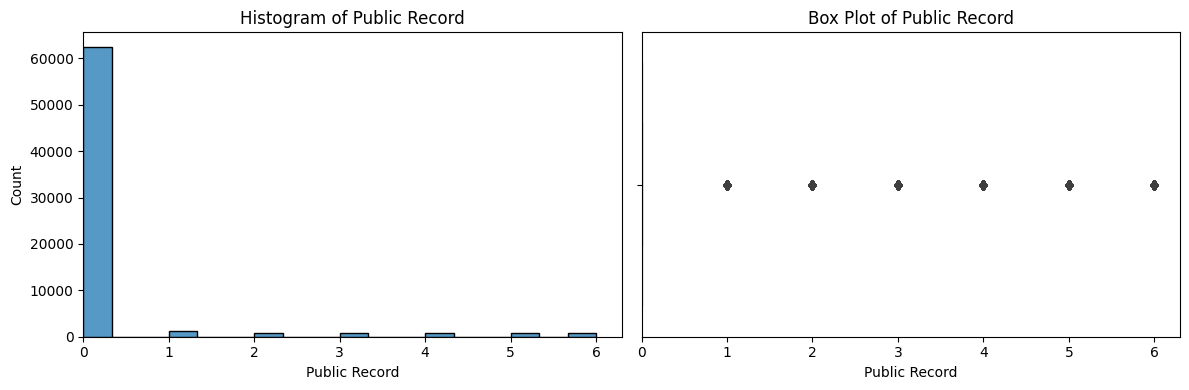

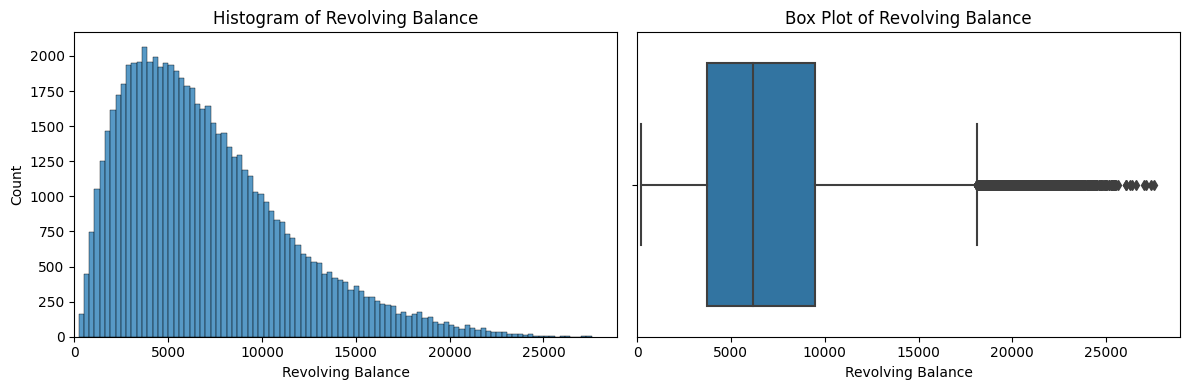

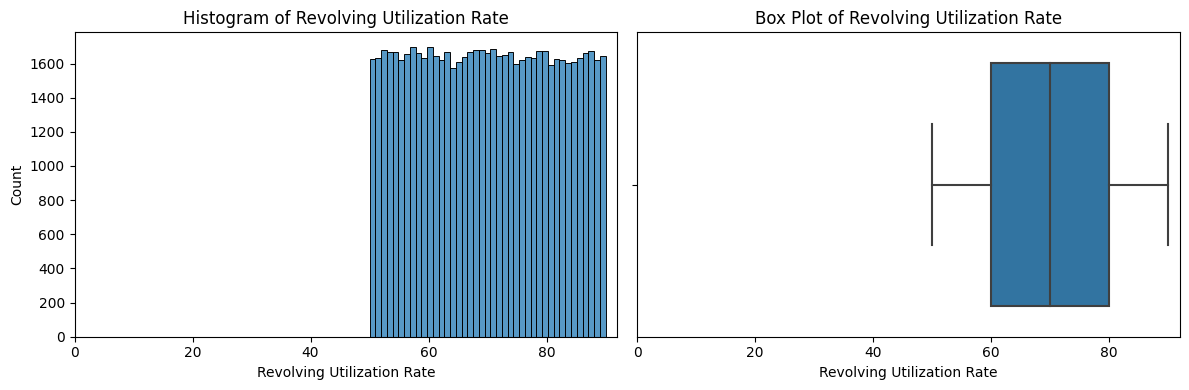

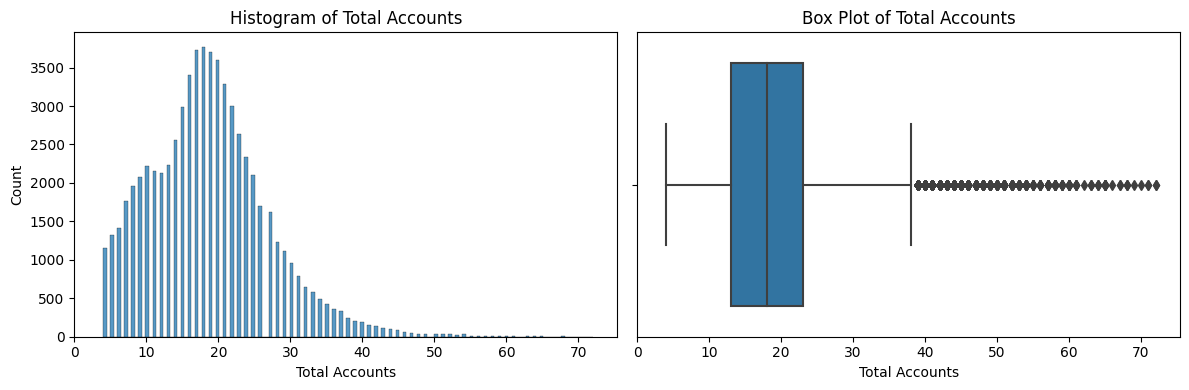

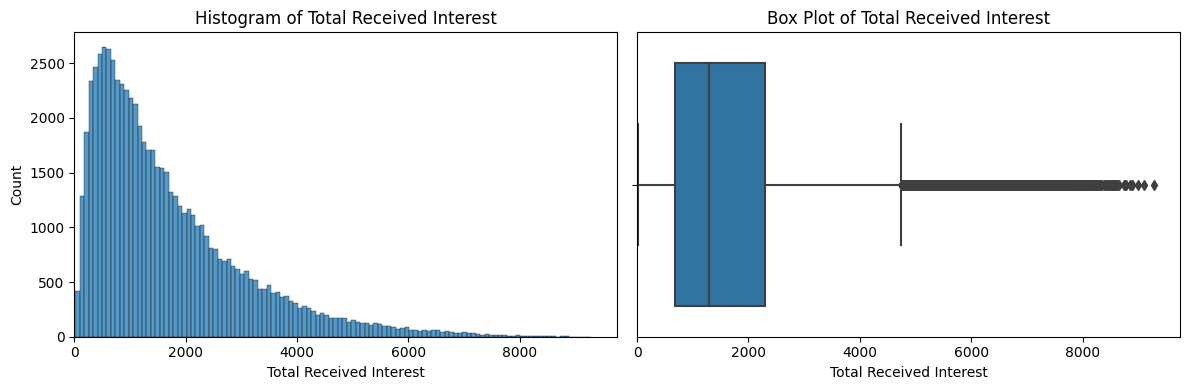

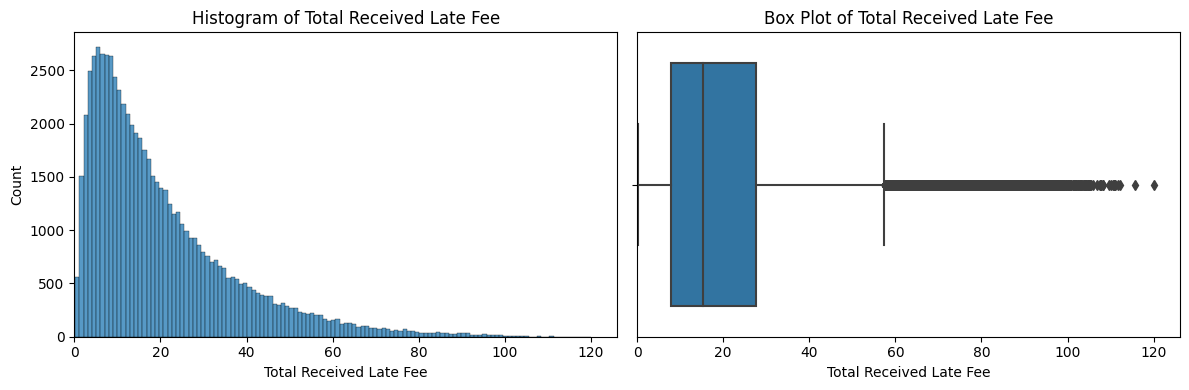

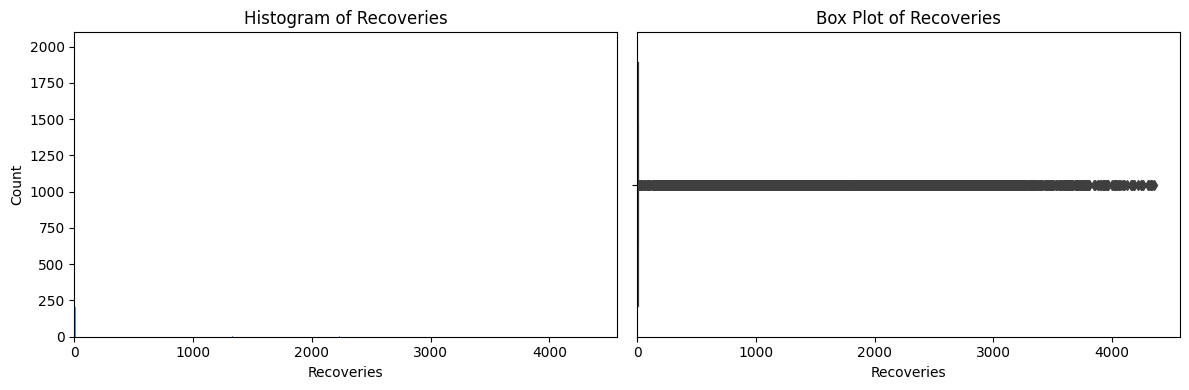

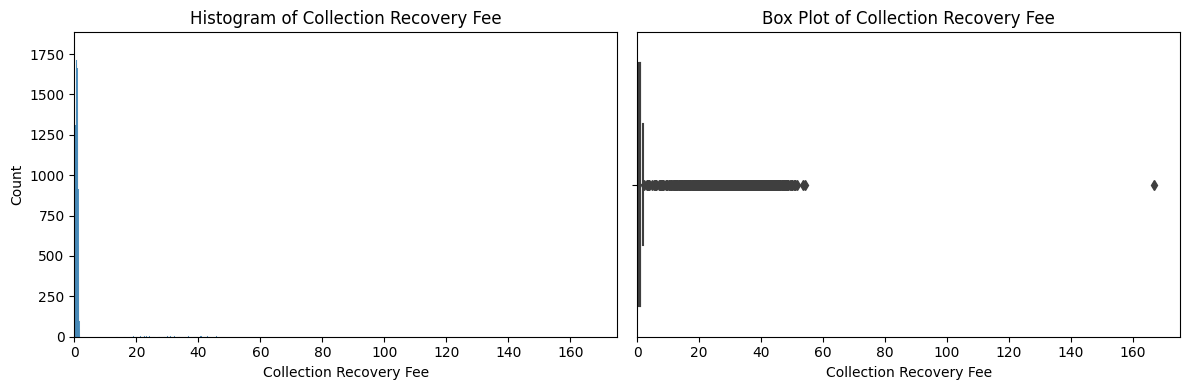

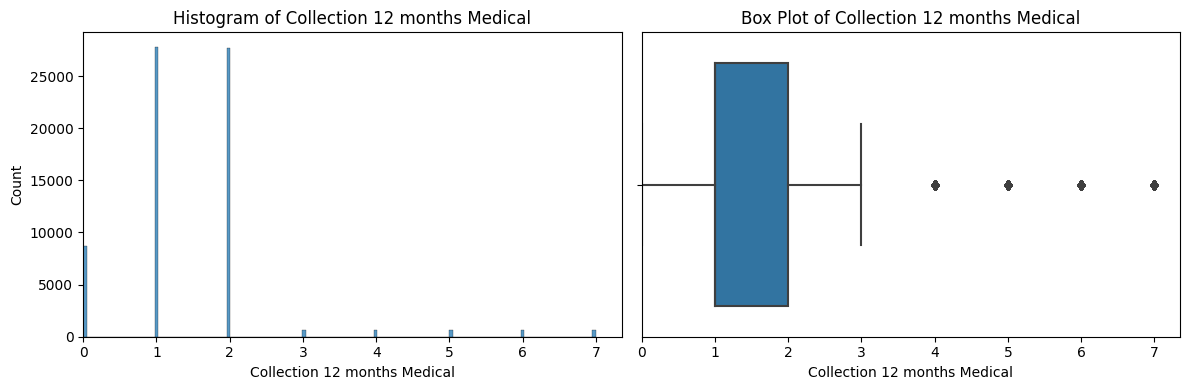

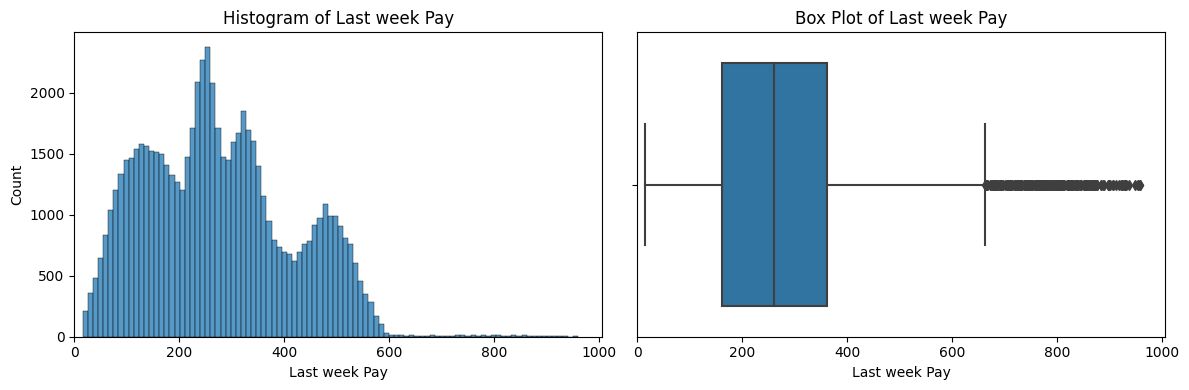

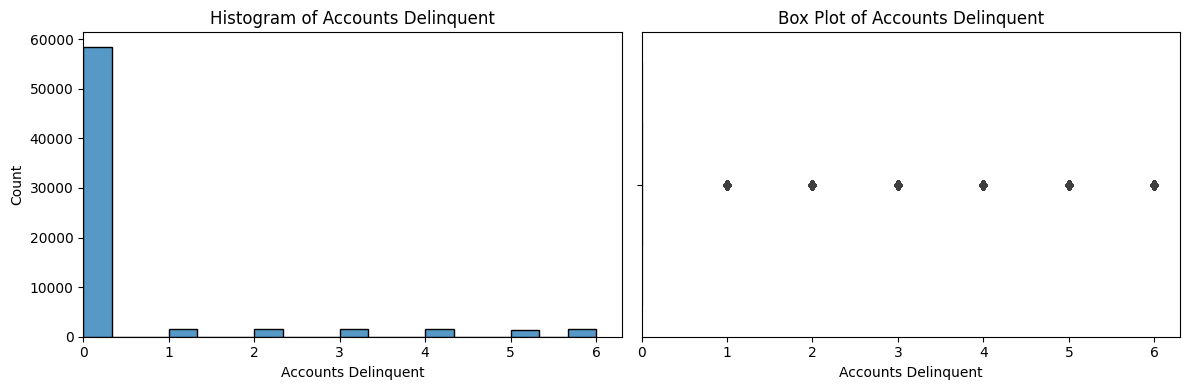

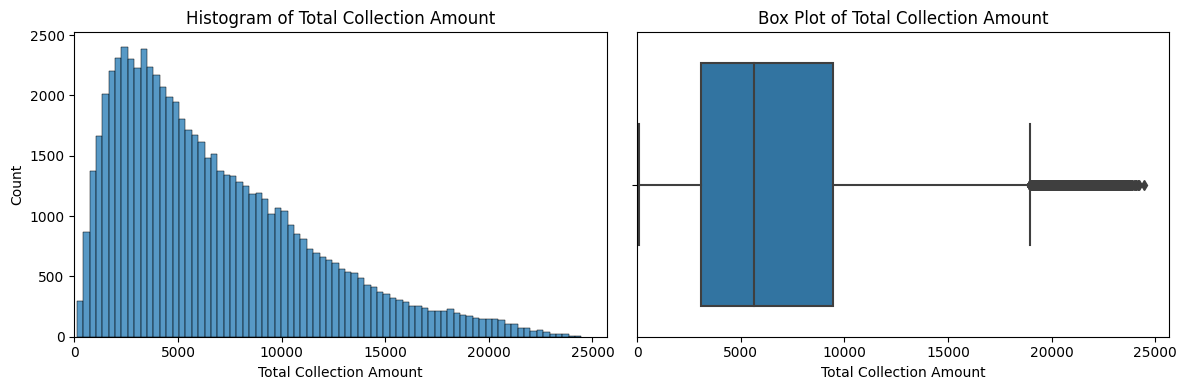

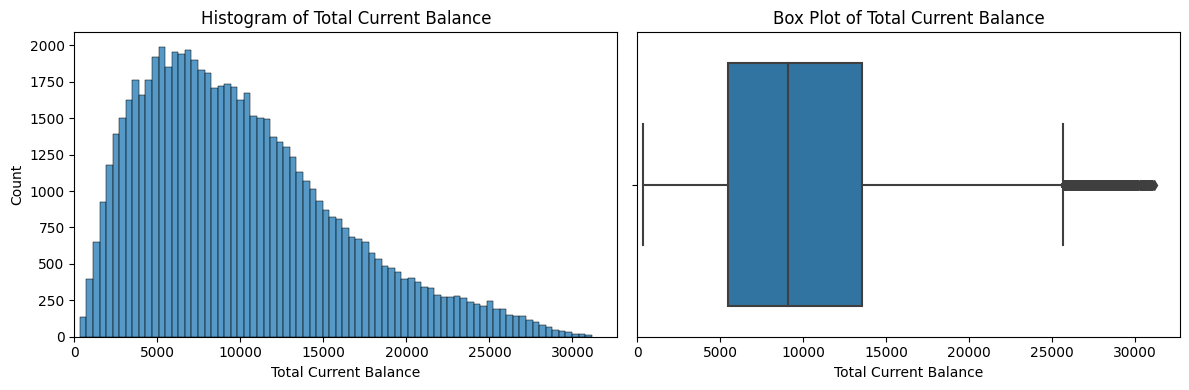

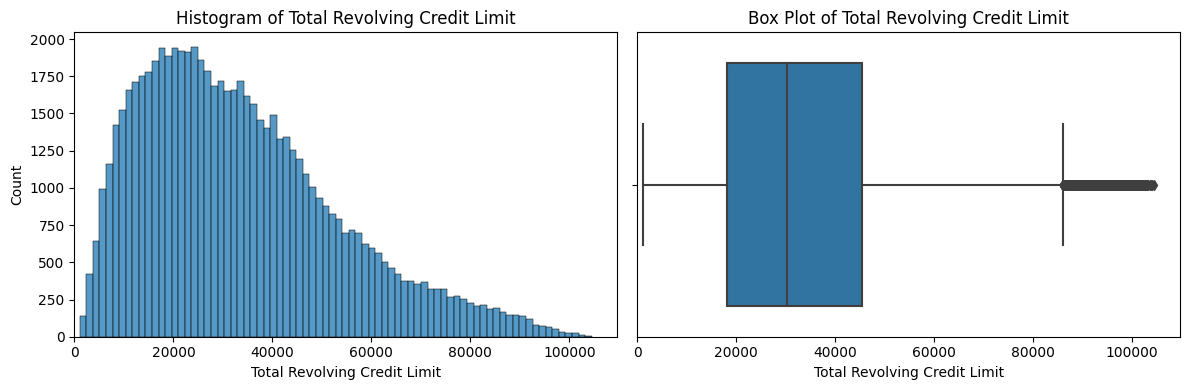

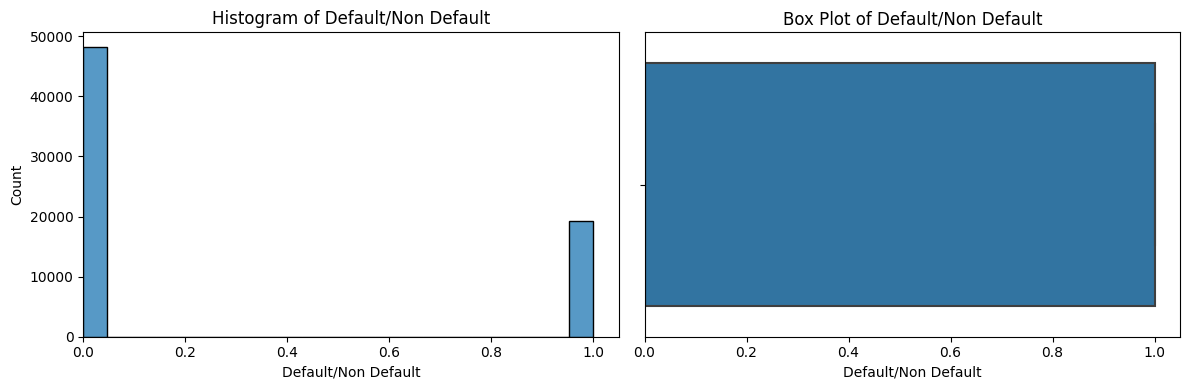

In [ ]:
# Univariate Analysis

# Create histograms and box plots for numeric features

for column in data.select_dtypes(exclude='object').columns:

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column,common_bins=False).set(xlim=(0))
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=column).set(xlim=(0))
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

**2.   Bar Chart**

The below code creates a bar chart to visualize the distribution of categories in the 'Loan Status' variable. It calculates the total count of entries in 'Loan Status' and then computes the percentage of each category relative to the total count. The bar chart is displayed with rotated category labels, and above each bar, the percentage value is annotated. This visualization provides a clear representation of the distribution of loan status categories and their respective proportions within the dataset, aiding in the exploratory data analysis process.
The defaulter loan status are around 29.19% in the train dataset.

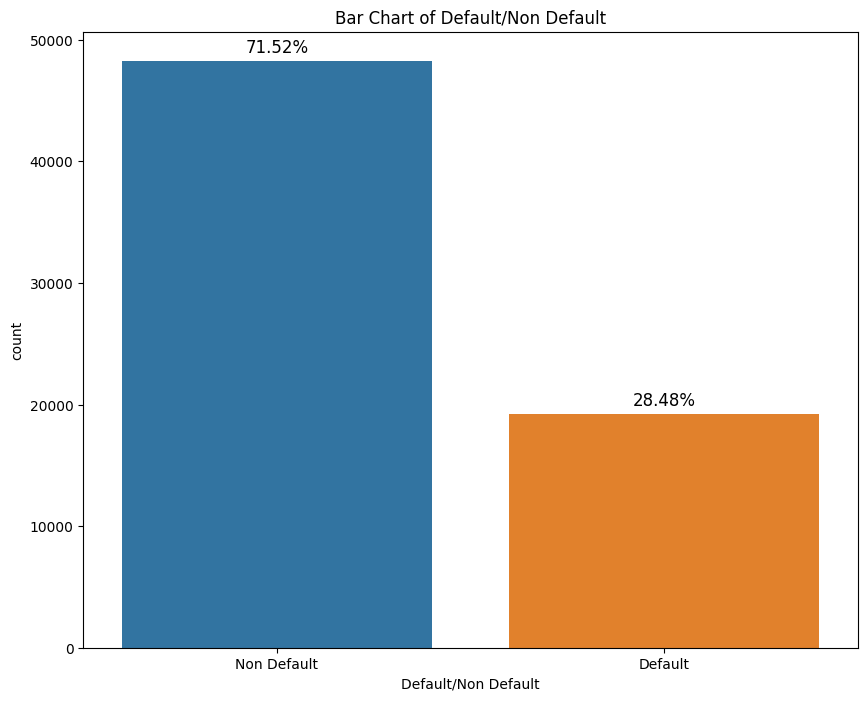

In [ ]:
# Bar Chart of Default/Non Default
# Calculate the total count of entries in 'Default/Non Default'
total_count = len(data)

# Calculate the percentage for each category in 'Default/Non Default'
percentage_data = (data['Default/Non Default'].value_counts(normalize=True) * 100).reset_index()

# Create the bar chart with larger figure size
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=data, x='Default/Non Default')
plt.title('Bar Chart of Default/Non Default')
plt.xticks(rotation=0)

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_count*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Add labels for 0 and 1
plt.xticks([0, 1], ['Non Default', 'Default'])

plt.show()


0 --> Non Default

1 --> Default


*   Loan status has default and non-default variations where Default is 28.48% and Non-default is 71.52%.



* **Bar charts for all the categorical variables**.

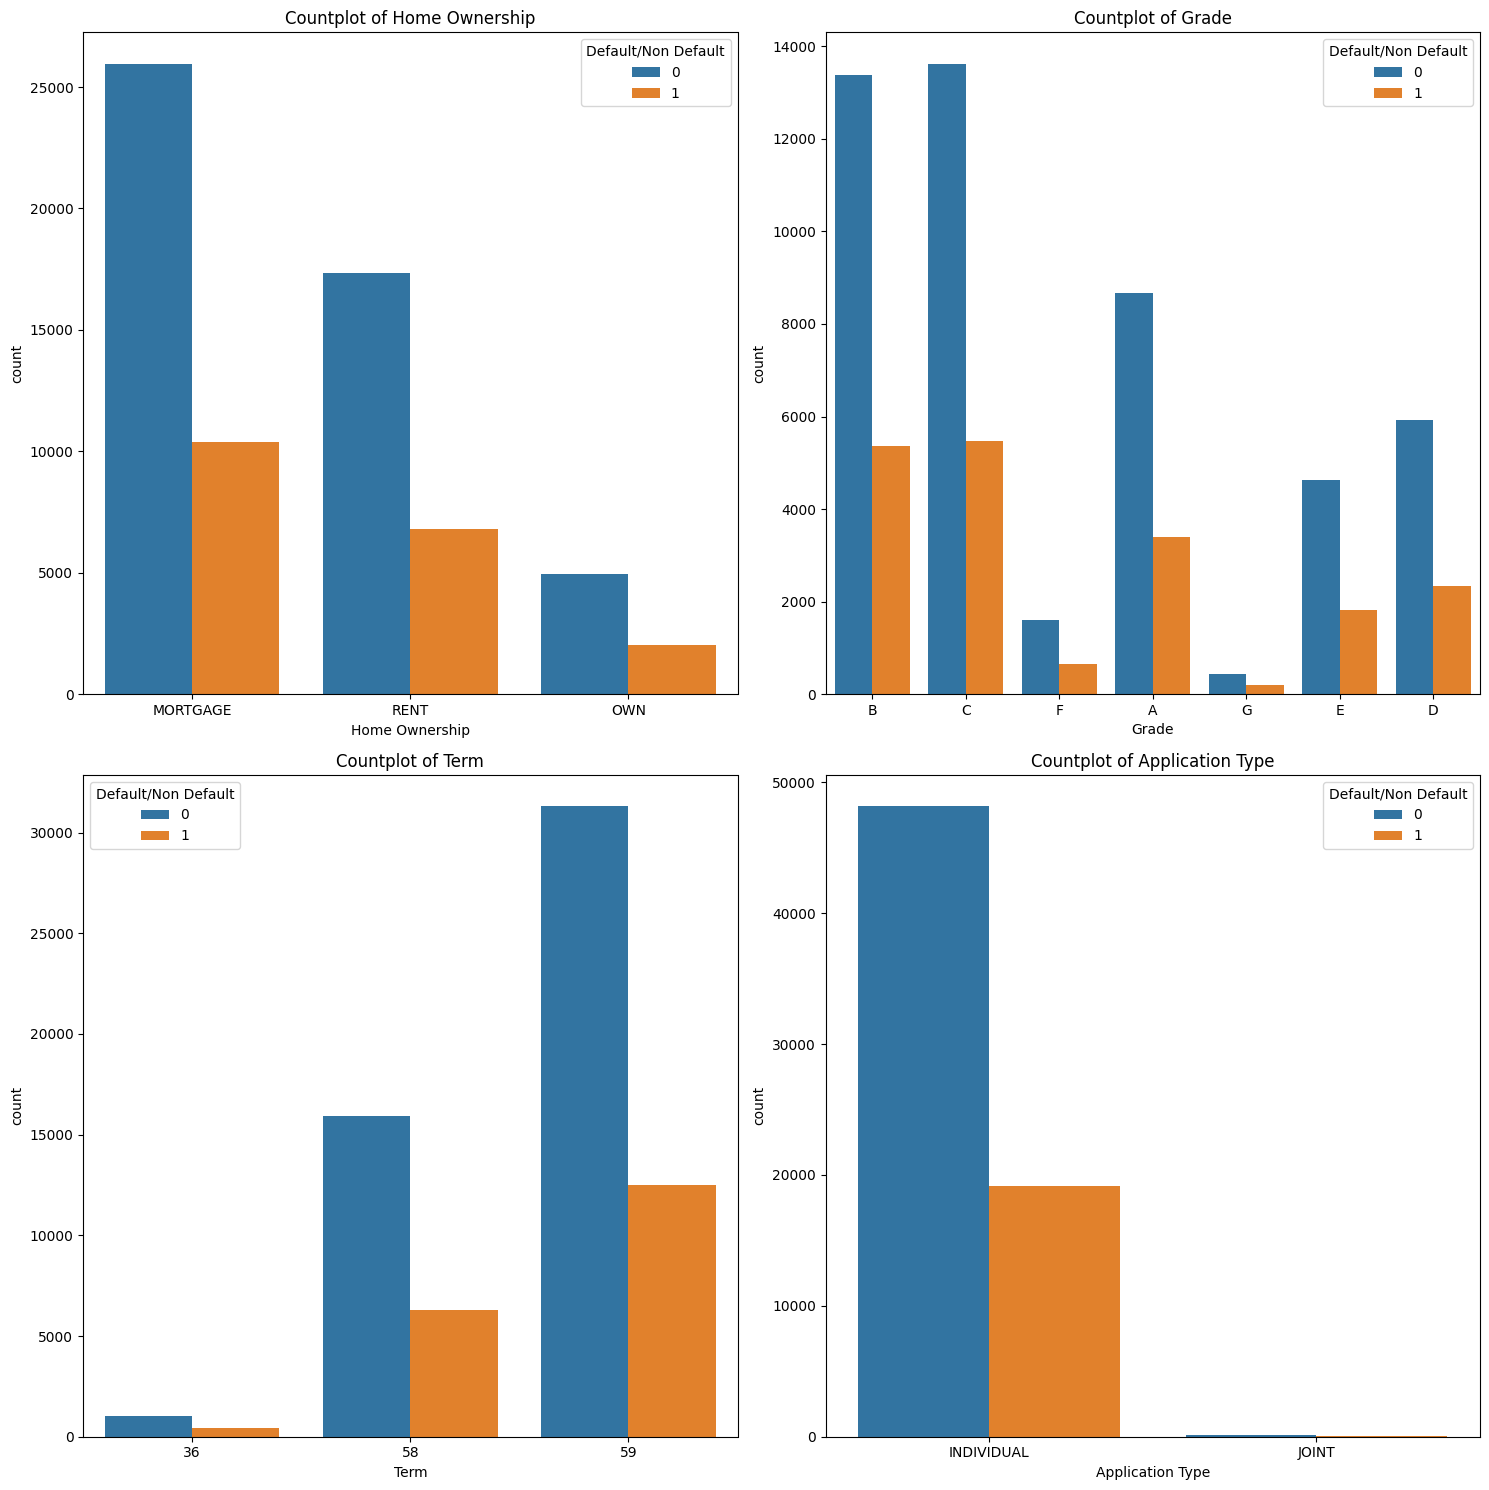

In [ ]:
categorical_variables = ['Home Ownership', 'Grade', 'Term', 'Application Type']

# Calculate the number of rows and columns for subplots
total_variables = len(categorical_variables)
r = (total_variables + 1) // 2  # Number of rows (rounded up)
c = 2  # Number of columns

# Create subplots for countplots
it = 1  # Iterator for subplots
plt.figure(figsize=(15, 15))

for i in categorical_variables:
    plt.subplot(r, c, it)
    sns.countplot(data=data, x=i, hue="Default/Non Default")
    plt.title(f'Countplot of {i}')
    it += 1

# Ensure tight layout and show the plots
plt.tight_layout()
plt.show()



*   **Bivariate and Multivariate Analysis**



**1**.   **Pairwise plots and Scatter plots**


The below code helps in conducting bivariate and multivariate analysis by creating pairwise plots and scatter plots for the numeric columns 'Loan Amount,' 'Interest Rate,' 'Debit to Income,' and 'Total Received Interest'. These plots visually represent the relationships between these numeric variables while distinguishing loan statuses using different colors ('Loan Status' variable as the hue). The pairplot allows for the examination of potential patterns, correlations, and differences in these numeric variables with respect to loan status, aiding in the exploration of relationships and insights within the dataset.

In [ ]:
# Pairwise Plots and Scatter Plots
# Pairwise plots for a selection of numeric columns
selected_numeric_columns = data.select_dtypes(exclude='object').columns
#sns.pairplot(data=data, vars=selected_numeric_columns, hue='Default/Non Default')
#plt.suptitle('Pairwise Plots of Numeric Variables', y=1.02)
#plt.show()


**2.**   **Heat Map and Correlation Matrix**


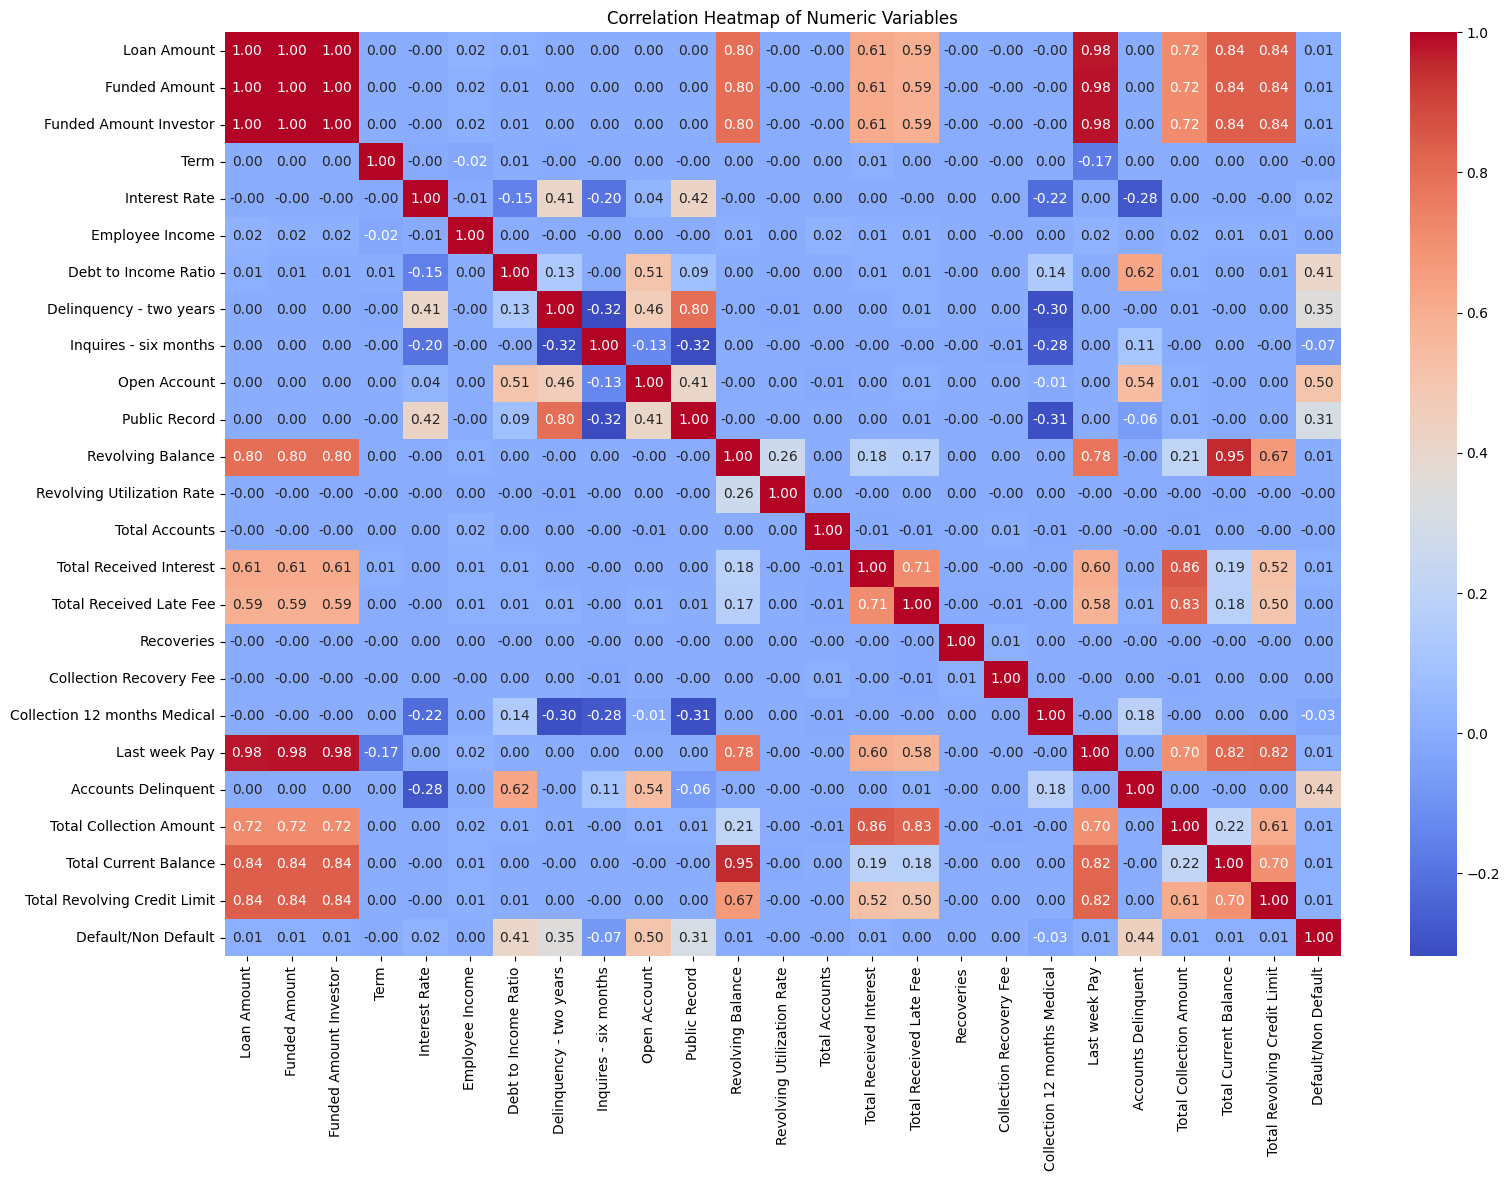

In [ ]:
# Heatmap to show correlations between numeric variables
plt.figure(figsize=(18, 12))
correlation_matrix = data[selected_numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


**3.**  **Cross Tabulation**


The below code performs a cross-tabulation analysis to examine the relationships between all the categorical variables and 'Loan Status.'
It generates a table that displays the count of occurrences for each combination of these two variables, providing insights into how the categorical variables relate to different 'Loan Status' outcomes.

In [ ]:
# Cross-tabulations for analyzing relationships between categorical variables
def cross_tabulation(data, variable):
    cross_tab = pd.crosstab(data[variable], data['Default/Non Default'])
    return cross_tab

# List of categorical variables you want to analyze
categorical_variables = ['Home Ownership', 'Grade', 'Term', 'Application Type']  # Add more variables as needed

# Perform cross-tabulation for each variable and print the results
for var in categorical_variables:
    result = cross_tabulation(data, var)
    print(f"\nCross-tabulation between '{var}' and 'Default/Non Default':\n{result}")


Cross-tabulation between 'Home Ownership' and 'Default/Non Default':
Default/Non Default      0      1
Home Ownership                   
MORTGAGE             25955  10396
OWN                   4945   2017
RENT                 17351   6799

Cross-tabulation between 'Grade' and 'Default/Non Default':
Default/Non Default      0     1
Grade                           
A                     8668  3387
B                    13377  5365
C                    13619  5466
D                     5924  2335
E                     4622  1824
F                     1600   646
G                      441   189

Cross-tabulation between 'Term' and 'Default/Non Default':
Default/Non Default      0      1
Term                             
36                    1029    428
58                   15921   6305
59                   31301  12479

Cross-tabulation between 'Application Type' and 'Default/Non Default':
Default/Non Default      0      1
Application Type                 
INDIVIDUAL           48156  1918

*   The analysis of loan status about various factors reveals essential patterns. Homeowners with mortgages tend to have higher default rates.
*   Lower-grade loans have more defaults, with grade 'G' being the riskiest.
*   Shorter loan terms have lower default rates compared to longer ones.
*   Although more common, individual loan applications have a higher default rate than joint applications. These insights help identify potential predictors of loan defaults.

**Analyze Class Distribution**


*   **Checking for Imbalance data**

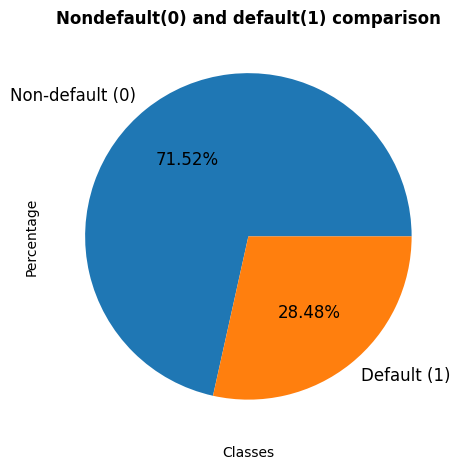

In [ ]:
# Check target classes balance

# Plot the classes
data.groupby('Default/Non Default').size().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 12}, labels=['Non-default (0)', 'Default (1)'])
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

*   Class imbalance is a common issue in machine learning, particularly in classification problems.
*   This dataset is also imbalanced, with 70.81% Non-default and 29.19% default.
*   We will use the SMOTE (Synthetic Minority Over-sampling Technique) technique during the modeling stage to overcome this problem and balance the dataset.





---



**Analyze Categorical Variables**


**1.**   **Frequency table and chi-square**

In [ ]:
import scipy.stats as stats

# Create a list of categorical columns you want to test
categorical_columns = ['Home Ownership', 'Grade','Loan Title','Application Type']

# Create empty lists to store results
results = []

# Loop through the categorical columns
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Default/Non Default'])

    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Create a DataFrame for the frequency table
    frequency_table = pd.DataFrame(contingency_table)
    frequency_table['Total'] = frequency_table.sum(axis=1)
    print("------------------------------------------",col,"------------------------------------")
    # Append results to the list
    results.append({
        'Column': col,
        'Chi-Square Statistic': chi2,
        'P-value': p,
        'Degrees of Freedom': dof,
        'Frequency Table': frequency_table
    })
    print(results,sep="\n")
    results.clear()
    print("--------------------------------------------End------------------------------------")
# Create a DataFrame to display the results
chi_square_results = pd.DataFrame(results)

# Print the results
#print(chi_square_results.to_string(index=False,header=True))


------------------------------------------ Home Ownership ------------------------------------
[{'Column': 'Home Ownership', 'Chi-Square Statistic': 2.3444583219972444, 'P-value': 0.30967585394338376, 'Degrees of Freedom': 2, 'Frequency Table': Default/Non Default      0      1  Total
Home Ownership                          
MORTGAGE             25955  10396  36351
OWN                   4945   2017   6962
RENT                 17351   6799  24150}]
--------------------------------------------End------------------------------------
------------------------------------------ Grade ------------------------------------
[{'Column': 'Grade', 'Chi-Square Statistic': 2.391251057147683, 'P-value': 0.8804343597912081, 'Degrees of Freedom': 6, 'Frequency Table': Default/Non Default      0     1  Total
Grade                                  
A                     8668  3387  12055
B                    13377  5365  18742
C                    13619  5466  19085
D                     5924  2335   8259

*   The analysis of frequency tables and chi-square tests reveals limited associations between categorical variables and 'Loan Status.'
*   Home ownership, loan grade, loan title, and application type show no strong links to loan default.
*   Further modeling may be needed to identify more influential predictors.






**Analyze Outliers**


*   **Outlier detection and handling**

In [ ]:
# Outlier Detection and Handling
# Let's assume 'Loan Amount' is the numerical column for outlier detection
# Calculate Z-score for each data point
z_scores = (data['Loan Amount'] - data['Loan Amount'].mean()) / data['Loan Amount'].std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Identify outlier indices
outlier_indices = z_scores[abs(z_scores) > outlier_threshold].index

# Check the statistics of the column before and after outlier removal
column_name = 'Loan Amount'  # Replace with the actual column name
column_stats_before = data[column_name].describe()

# Remove outliers from the data
data.drop(outlier_indices, inplace=True)

# Check the statistics of the column after outlier removal
column_stats_after = data[column_name].describe()

# Print the statistics for comparison
print("Column statistics before outlier removal:")
print(column_stats_before)

print("\nColumn statistics after outlier removal:")
print(column_stats_after)

# find number of unique values
print(data.nunique())


Column statistics before outlier removal:
count    67463.000000
mean     16848.902776
std       8367.865726
min       1014.000000
25%      10012.000000
50%      16073.000000
75%      22106.000000
max      35000.000000
Name: Loan Amount, dtype: float64

Column statistics after outlier removal:
count    67463.000000
mean     16848.902776
std       8367.865726
min       1014.000000
25%      10012.000000
50%      16073.000000
75%      22106.000000
max      35000.000000
Name: Loan Amount, dtype: float64
Loan Amount                     27525
Funded Amount                   67463
Funded Amount Investor          67463
Term                                3
Interest Rate                   60041
Grade                               7
Home Ownership                      3
Employee Income                 67221
Loan Title                        109
Debt to Income Ratio            65426
Delinquency - two years             9
Inquires - six months               7
Open Account                       36
Pu

# **Feature Engineering Exploration**

**Encoding Categorical Features**


The below code conducts preprocessing on categorical features in the dataset. It starts by displaying the number of unique values for each categorical column. It selects columns with more than 10 unique values and replaces their categorical values with the mean of the target variable 'Loan Status' for each unique category. This encoding technique transforms categorical data into numerical values. Then, one-hot encoding is applied to the remaining categorical features, converting them into binary columns representing different categories. The code concludes by displaying the shape of the dataset after these preprocessing steps, ensuring it's ready for machine learning tasks.

In [ ]:
#one hot encoding
data = pd.get_dummies(data,columns=['Home Ownership', 'Grade', 'Loan Title','Application Type'])
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employee Income,Debt to Income Ratio,Delinquency - two years,Inquires - six months,Open Account,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Application Type_INDIVIDUAL,Application Type_JOINT
0,10000,9253.764684,9253.764684,59,11.140000,176346.63,35.463167,1,0,13,...,0,0,0,0,0,0,0,0,1,0
1,3609,3237.755453,3237.755453,59,21.166814,39833.92,12.222575,0,1,7,...,0,0,0,0,0,0,0,0,1,0
2,28276,26243.319678,26243.319678,59,10.787944,91506.69,21.987305,0,2,3,...,0,0,0,0,0,0,0,0,1,0
3,11170,10383.860151,10383.860151,59,16.730000,108286.58,34.891902,1,0,7,...,0,0,0,0,0,0,0,0,1,0
4,16890,16596.842701,16596.842701,59,11.840616,44234.83,24.234186,0,2,5,...,0,0,0,0,0,0,0,0,1,0


# Explore the relationship between Loan Amount and Loan Status
The above code creates a boxplot using Seaborn library to investigate the relationship between 'Loan Amount' and 'Loan Status' variables. The x-axis displays 'Loan Status', while the y-axis represents the 'Loan Amount'. This box plot offers insights into the distribution of loan amounts across different loan approval statuses. The distribution appears to be normally distributed.   

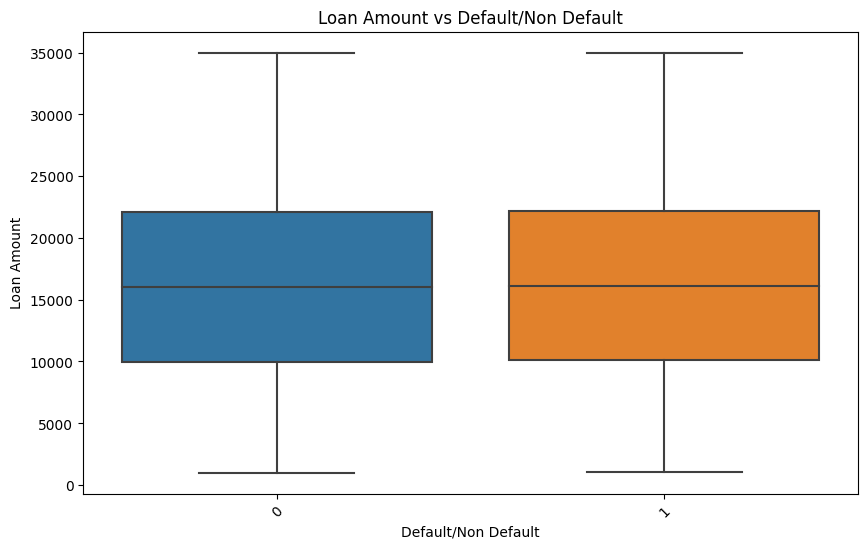

In [ ]:
# Explore the relationship between Loan Amount and Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Default/Non Default', y='Loan Amount')
plt.title('Loan Amount vs Default/Non Default')
plt.xticks(rotation=45)
plt.show()


* **Ethics Issue**


In this Loan Default Prediction project, addressing bias is crucial, especially for groups like renters with mortgages, individuals with public records, and those with lower incomes. Biased analysis could lead to skewed findings and worsen financial inequality. Ensuring fairness, transparency, and ethical data handling is a top priority to respect everyone's rights and avoid discrimination.

# **Feature Engineering Exploration**

In [ ]:
data.drop(['Loan Amount','Funded Amount Investor','Term','Employee Income','Revolving Balance',
           'Revolving Utilization Rate','Total Accounts','Total Received Interest','Total Received Late Fee',
           'Recoveries','Collection Recovery Fee','Last week Pay','Total Collection Amount',
           'Total Current Balance','Total Revolving Credit Limit','Initial List Status'], axis=1,inplace=True)

In [ ]:
data.describe()

,Funded Amount,Interest Rate,Debt to Income Ratio,Delinquency - two years,Inquires - six months,Open Account,Public Record,Collection 12 months Medical,Accounts Delinquent,Default/Non Default,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Application Type_INDIVIDUAL,Application Type_JOINT
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,15924.593772,16.573023,20.725649,0.334524,1.451107,6.347909,0.237938,1.477091,0.469620,0.284778,...,0.000222,0.000193,0.000148,0.000741,0.000385,0.000371,0.000133,0.000148,0.998177,0.001823
std,7931.007990,5.792368,8.424437,1.211673,0.953784,4.685868,0.971692,1.092640,1.347263,0.451312,...,0.014910,0.013880,0.012174,0.027214,0.019628,0.019247,0.011549,0.012174,0.042661,0.042661
min,936.176404,5.320000,1.300000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9465.023933,11.767132,14.038354,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,15200.041561,16.143078,19.823614,0.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,20984.654226,20.874404,25.669587,0.000000,2.000000,7.000000,0.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,34900.571451,36.991170,42.998326,8.000000,6.000000,37.000000,6.000000,7.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Splitting the dataset for training of the data**

In [ ]:
from sklearn.model_selection import train_test_split

*   Creating feature variable

In [ ]:
#create feature variable
X  = data.drop(['Default/Non Default'],axis=1)
X

,Funded Amount,Interest Rate,Debt to Income Ratio,Delinquency - two years,Inquires - six months,Open Account,Public Record,Collection 12 months Medical,Accounts Delinquent,Home Ownership_MORTGAGE,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Application Type_INDIVIDUAL,Application Type_JOINT
0,9253.764684,11.140000,35.463167,1,0,13,0,7,2,1,...,0,0,0,0,0,0,0,0,1,0
1,3237.755453,21.166814,12.222575,0,1,7,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26243.319678,10.787944,21.987305,0,2,3,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,10383.860151,16.730000,34.891902,1,0,7,0,6,3,1,...,0,0,0,0,0,0,0,0,1,0
4,16596.842701,11.840616,24.234186,0,2,5,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13571.438122,20.750143,19.900642,0,2,4,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
67459,7792.827995,18.698880,16.252276,0,1,7,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
67460,14760.778346,12.004233,11.533047,0,2,4,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
67461,15914.066683,22.666046,27.656048,0,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


*   Creating target variable


In [ ]:
# created target variable
y = data['Default/Non Default']
y

0        0
1        0
2        0
3        1
4        0
        ..
67458    0
67459    1
67460    0
67461    0
67462    0
Name: Default/Non Default, Length: 67463, dtype: int64

In [ ]:
# Save all feature names as list
feature_cols = X.columns.tolist()

*   Partitioning train and test 80% and 20% with random state 42.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,stratify=y
    )

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53970 entries, 35316 to 44815
Columns: 130 entries, Funded Amount to Application Type_JOINT
dtypes: float64(3), int64(6), uint8(121)
memory usage: 10.3 MB


*   Training dataset has only 8 numerical variables which were correlated.

**Standardizing/ Rescaling the features**
  *   Feature scaling for both training and testing data by employing StandardScaler.
  *    It normalizes the features to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Define function to rescale training data using StandardScaler
def scale_data(X_train, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

*   In order to ensure that the class imbalance in our population is fairly replicated in our train and test set.

In [ ]:
print("Proportion of non-defaulters in train set " + str(round(y_train.sum()/len(y_train) * 100,2 )) + "%")
print("Proportion of non-defaulters in test set " + str(round(y_test.sum()/len(y_test) * 100,2 )) + "%")

Proportion of non-defaulters in train set 28.48%
Proportion of non-defaulters in test set 28.48%


**-----------------------------------------------------------------------**

# **Modeling**

**Preparing a dataframe for model analysis**
*   **SMOTE for Imbalanced data**

  *   Synthetic Minority Over-sampling Technique (SMOTE) on the training data to balance the class distribution.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#fit predictor and target variable
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

*   Importing required libraries

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

*   Cross-validation on various machine learning models using training data, computes several performance metrics.

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.simplefilter("ignore")

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_score': make_scorer(roc_auc_score)
}

# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('XGBClassifier', xgb.XGBClassifier(objective="binary:logistic", random_state=42)))
models.append(('RandomForestClassifier', RandomForestClassifier()))

# Create an empty dataframe for train data
train_results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 'Train ROC Score'])

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_validate(model, X_train_scaled_smote, y_train_smote, cv=kfold, scoring=scoring, return_train_score=True)

    # Append training metrics to the train_results dataframe
    train_results = train_results._append({
        'Model': name,
        'Train Accuracy': np.mean(cv_results['train_accuracy']),
        'Train Precision': np.mean(cv_results['train_precision']),
        'Train Recall': np.mean(cv_results['train_recall']),
        'Train F1 Score': np.mean(cv_results['train_f1_score']),
        'Train ROC Score': np.mean(cv_results['train_roc_score'])
    }, ignore_index=True)

# Style the dataframe for better presentation
styled_train_results = train_results.style.format({
    'Train Accuracy': '{:.4f}',
    'Train Precision': '{:.4f}',
    'Train Recall': '{:.4f}',
    'Train F1 Score': '{:.4f}',
    'Train ROC Score': '{:.4f}'
})

# Display the styled train data
print("\033[1mTrain Metrics:\033[0m")
styled_train_results


Train Metrics:


,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Train ROC Score
0,LogisticRegression,0.7794,0.9328,0.6023,0.7320,0.7794
1,DecisionTreeClassifier,1.0000,1.0000,1.0000,1.0000,1.0000
2,XGBClassifier,0.8739,0.9548,0.7848,0.8615,0.8739
3,RandomForestClassifier,1.0000,1.0000,1.0000,1.0000,1.0000



*   The above table lists the training performance measures for various machine learning models, including F1 score, ROC score, accuracy, precision, and recall.
*   Notably, the Logistic Regression and XGBoost models performed admirably but slightly below par, whereas the Decision Tree and Random Forest models received perfect scores (1.000) in every criterion.

---------------------------------------------------------------------------

*   Calculating and displaying the test performance metrics for various machine learning models, including accuracy, precision, recall, F1 score, and ROC score.

In [ ]:
# Create an empty dataframe for test data
test_results = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC Score'])

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_validate(model, X_train_scaled_smote, y_train_smote, cv=kfold, scoring=scoring, return_train_score=True)

    # Append test metrics to the test_results dataframe
    test_results = test_results._append({
        'Model': name,
        'Test Accuracy': np.mean(cv_results['test_accuracy']),
        'Test Precision': np.mean(cv_results['test_precision']),
        'Test Recall': np.mean(cv_results['test_recall']),
        'Test F1 Score': np.mean(cv_results['test_f1_score']),
        'Test ROC Score': np.mean(cv_results['test_roc_score'])
    }, ignore_index=True)

# Style the dataframe for better presentation
styled_test_results = test_results.style.format({
    'Test Accuracy': '{:.4f}',
    'Test Precision': '{:.4f}',
    'Test Recall': '{:.4f}',
    'Test F1 Score': '{:.4f}',
    'Test ROC Score': '{:.4f}'
})

# Display the styled test data
print("\033[1mTest Metrics:\033[0m")
styled_test_results

Test Metrics:


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test ROC Score
0,LogisticRegression,0.7784,0.9317,0.6009,0.7306,0.7784
1,DecisionTreeClassifier,0.8080,0.8028,0.8167,0.8097,0.8080
2,XGBClassifier,0.8707,0.9503,0.7824,0.8582,0.8707
3,RandomForestClassifier,0.8814,0.9316,0.8232,0.8740,0.8814



*   The above table presents test metrics for four machine learning models. It shows their performance in terms of accuracy, precision, recall, F1 score, and ROC score. RandomForestClassifier has the highest accuracy at 88.22%, indicating strong overall performance.



--------------------------------------------------------------------------------



In [ ]:
import time
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgboost_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

classifiers = [logistic_regression, decision_tree, random_forest, xgboost_classifier]

for classifier in classifiers:
    start_time = time.time()
    classifier.fit(X_train_scaled_smote, y_train_smote)
    end_time = time.time()
    run_time = end_time - start_time
    print(f"{classifier.__class__.__name__} took {run_time:.2f} seconds to fit the model.")

LogisticRegression took 0.76 seconds to fit the model.
DecisionTreeClassifier took 2.37 seconds to fit the model.
RandomForestClassifier took 23.39 seconds to fit the model.
XGBClassifier took 2.38 seconds to fit the model.


# **Predictive modeling**

**Model Optimization**

*   **Grid Search on Logistic Regression Model**

*   Importing required libraries

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

  *   Initializing a logistic regression model with the 'liblinear' solver and a specified random state.

In [ ]:
lr = LogisticRegression(solver='liblinear',random_state=15)

  *   Defining a dictionary containing different hyperparameter values for tuning a logistic regression model, including values for regularization strength (C), class weight options, and penalty types (l1 and l2).

In [ ]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [ ]:
grid_search_log = GridSearchCV(estimator=lr,param_grid=lr_params,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search_log = grid_search_log.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.7796041727276786


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 0.001, 'class_weight': None, 'penalty': 'l1'}

In [ ]:
y_pred_log = grid_search_log.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
cm = confusion_matrix(y_test, y_pred_log)

In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.858519,0.864906,0.596409,0.705991,0.779655


The above values for the tuned Logistic Regression model indicate that it achieves an accuracy of about 85.85%, a precision of around 86.49%, a recall of 59.64%, an F1 Score of 0.7060, and an ROC score of approximately 0.7797.

In [ ]:
#print confusion matrix
cm

array([[9292,  358],
       [1551, 2292]])

A confusion matrix with counts for true negatives (9,292), false positives (358), false negatives (1,551), and true positives (2,292).



---



 *   **Grid Search on Decision Tree**

*   Hyperparameter tuning for a Decision Tree classifier using a grid search approach to optimize the model's accuracy.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_1 = grid_search_dt.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8524929759374895


In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [ ]:
y_pred_dct = grid_search_dt.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results._append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.858519,0.864906,0.596409,0.705991,0.779655
1,Decision Tree Tuned,0.855925,0.861714,0.588603,0.699443,0.775493


The "Decision Tree Tuned" model exhibits an accuracy of approximately 85.67%, with a well-balanced precision and recall of about 85.63% and 59.69%, resulting in an F1 Score of around 70.35%. Its ROC score is approximately 77.85%, indicating its strong ability to classify positive and negative cases.

In [ ]:
#print confusion matrix
cm

array([[9292,  358],
       [1551, 2292]])

A confusion matrix representing the performance of a binary classification model. It correctly identified 9,292 true negatives and 2,292 true positives. However, it also made 358 false negative errors and 1,551 false positive errors.

---



  *   **Grid Search on Random Forest**

*   Fine-tuning a Random Forest Classifier by searching for optimal hyperparameters, such as the number of trees, the splitting criterion, and class weights, while evaluating accuracy through cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [ ]:
param_grid_rf = {'n_estimators': [100, 200], # It is going to be a long search
              'criterion': ['entropy'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8854065659590761


In [ ]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 200}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

In [ ]:
model =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results._append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.858519,0.864906,0.596409,0.705991,0.779655
1,Decision Tree Tuned,0.855925,0.861714,0.588603,0.699443,0.775493
2,Random Forest Tuned,0.848810,0.815983,0.605777,0.695341,0.775686


The above table summarizes the performance metrics of a tuned Random Forest model: Accuracy (0.792411), Precision (0.635044), Recall (0.637523), F1 Score (0.636281), and ROC score (0.745808). These metrics assess the model's classification performance.

In [ ]:
from sklearn.metrics import confusion_matrix
#print confusion matrix
cm

array([[9125,  525],
       [1515, 2328]])

The array represents a confusion matrix with four values: 8242 true negatives, 1408 false positives, 1393 false negatives, and 2450 true positives, typically used for evaluating a classification model's performance.

________________________________________________________________________________

*   **Grid Search on XG Boost**

Hyperparameter tuning for an XGBoost classifier through cross-validation to find the optimal hyperparameters, specifically focusing on the max depth of trees, the number of estimators, and the learning rate to maximize the model's accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

estimator = xgb.XGBClassifier(objective="binary:logistic", random_state=1)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [10],
    'learning_rate': [0.1]}

In [ ]:
grid_search_xg = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 1,
    cv = 5
)

In [ ]:
grid_search_xgboost = grid_search_xg.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_xg = grid_search_xgboost.best_score_

In [ ]:
print('Accuracy on xg boost :',best_accuracy_xg)

Accuracy on xg boost : 0.8637622038157613


In [ ]:
best_parameters = grid_search_xgboost.best_params_
best_parameters

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 10}

In [ ]:
y_pred_xg= grid_search_xgboost.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_xg)
acc = accuracy_score(y_test, y_pred_xg)
prec = precision_score(y_test, y_pred_xg)
rec = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)
cm = confusion_matrix(y_test, y_pred_xg)

In [ ]:
model =  pd.DataFrame([['XG Boost Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results._append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.858519,0.864906,0.596409,0.705991,0.779655
1,Decision Tree Tuned,0.855925,0.861714,0.588603,0.699443,0.775493
2,Random Forest Tuned,0.848810,0.815983,0.605777,0.695341,0.775686
3,XG Boost Tuned,0.858371,0.864804,0.595889,0.705592,0.779395


The tuned XGBoost model exhibits an accuracy of 0.858297, precision of 0.86473, and recall of 0.595628, resulting in an F1 score of 0.705393 and an ROC score of 0.779265.

In [ ]:
#print confusion matrix
cm

array([[9292,  358],
       [1553, 2290]])

This confusion matrix represents a classification model's performance. It has 9292 true negatives, 358 false positives, 1554 false negatives, and 2289 true positives.

________________________________________________________________________

# **Model Comparison**

  **Confusion Matrices**

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

In [ ]:
y_test.shape,y_pred_xg.shape

((13493,), (13493,))

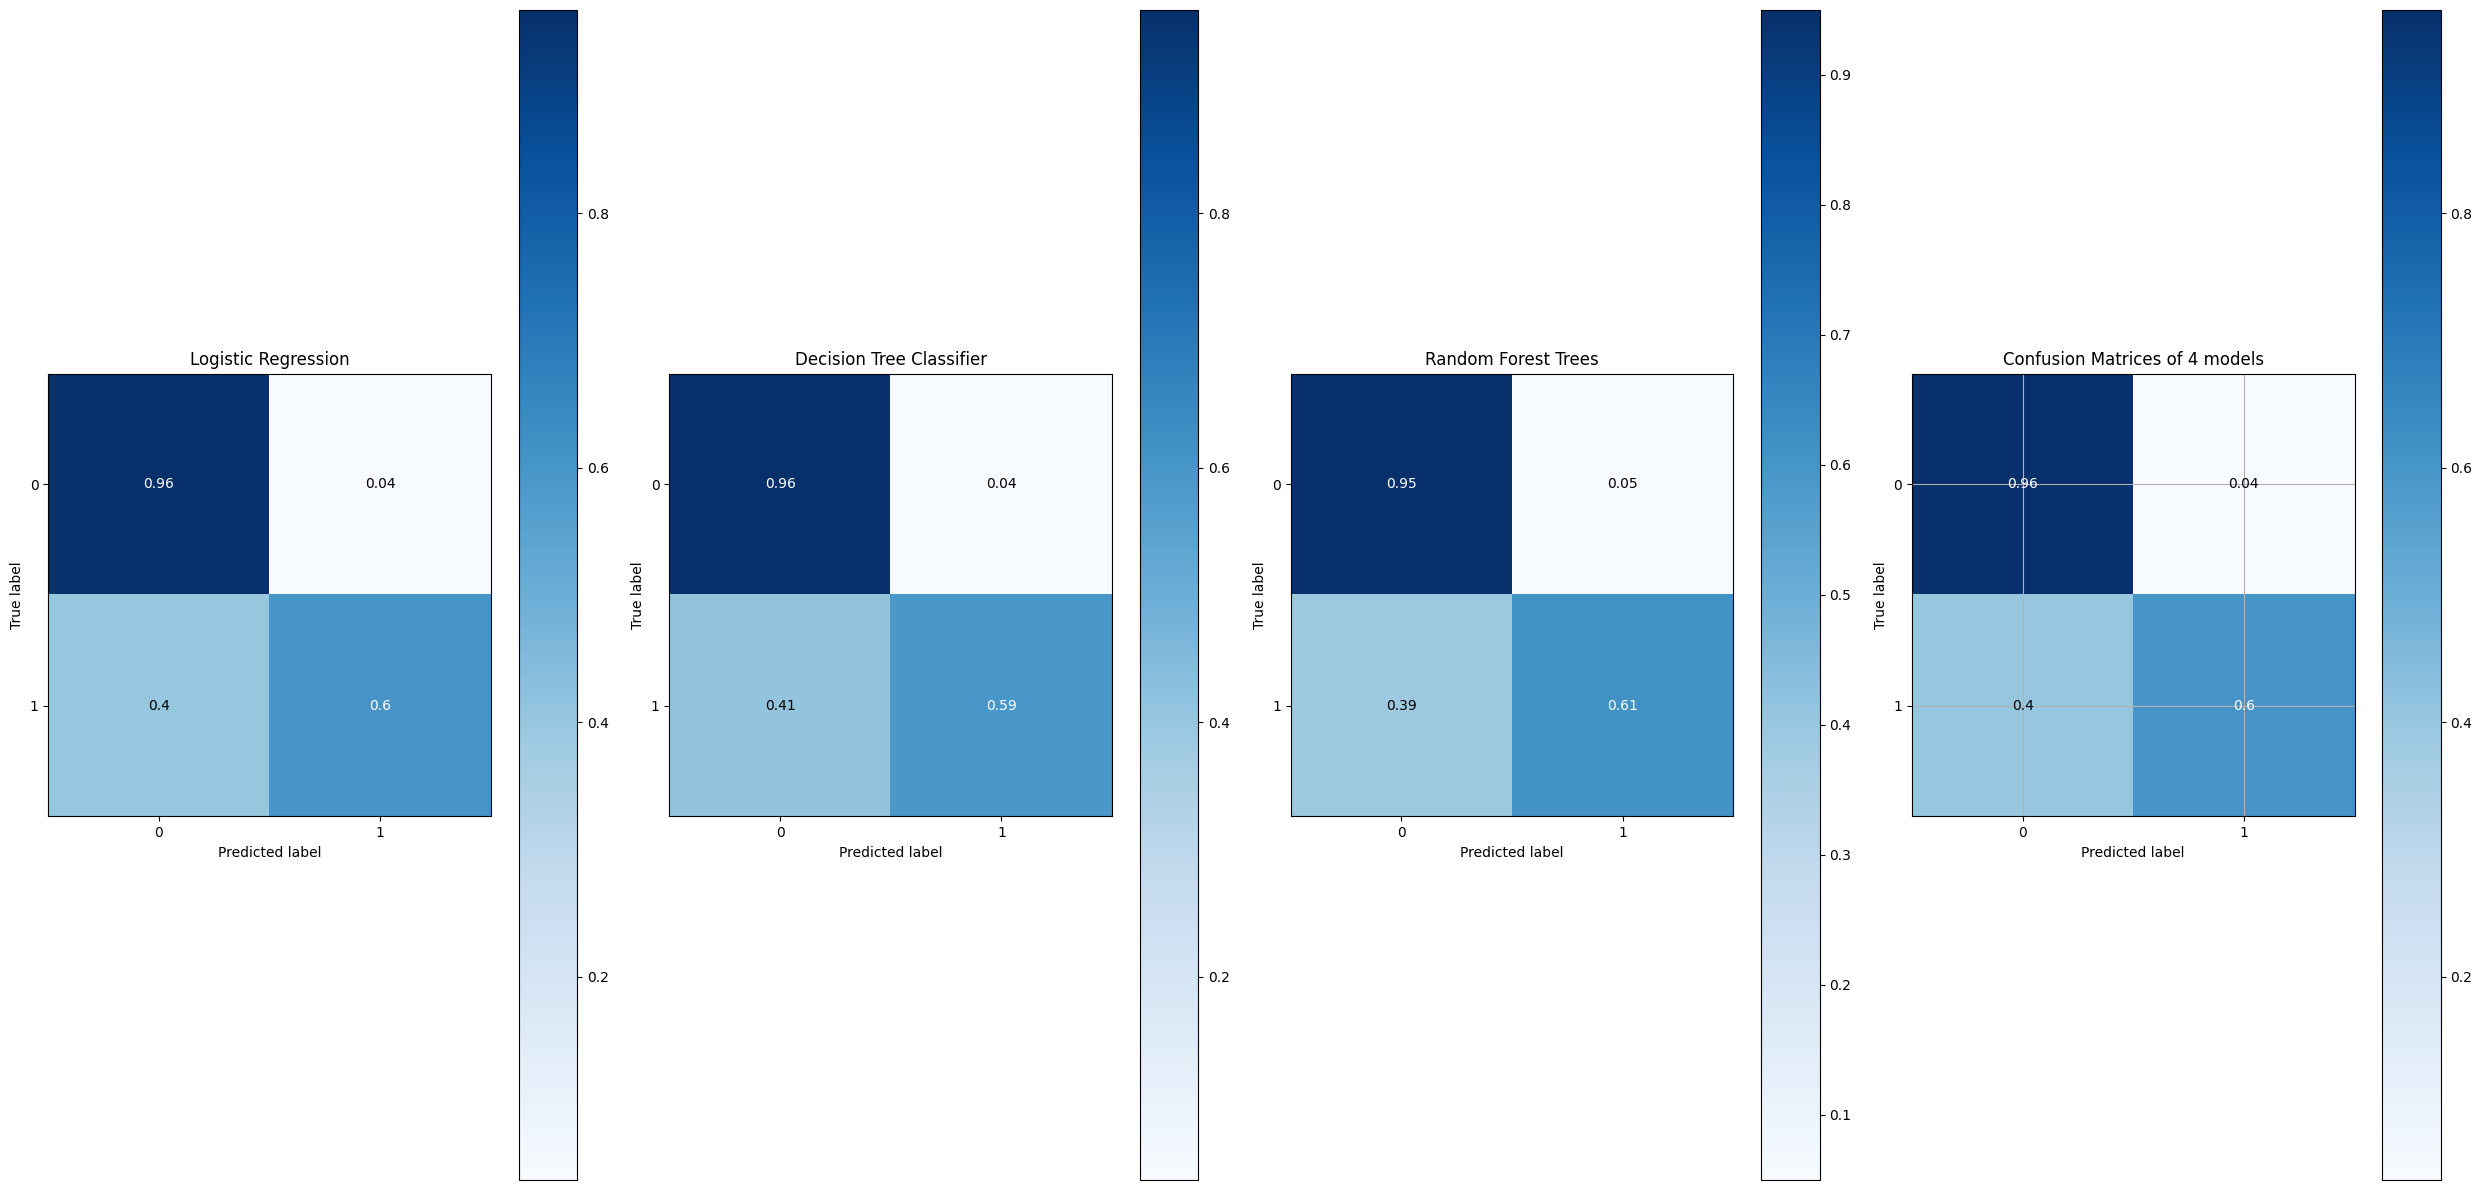

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(25,12))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log,normalize=True,title="Logistic Regression",ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dct,normalize=True,title="Decision Tree Classifier",ax=ax[1])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rf,normalize=True,title="Random Forest Trees",ax=ax[2])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_xg,normalize=True,title="XG Boost",ax=ax[3])

#plt.title('Confusion Matrices of 4 models')
plt.tight_layout()
plt.grid()

*   *   The most favorable choice among these models for predicting loan defaults is the one with the highest true positive rate and the lowest false negative rate.
*    All models have a similar true positive rate of approximately 96%, but the Random Forest models exhibit slightly lower false negative rates at around 39%, respectively, compared to Logistic Regression, Decision Tree, and XGBoost, which have false negative rates of around 40%.
*   Hence, Random Forest model is more suitable if reducing false negatives is a primary concern.


**ROC_AUC Curve**

*   The below code calculates and plots ROC curves for four classification models, namely Logistic Regression, Decision Tree, Random Forest, and XG Boost, to assess their performance in classifying data.
*    It uses AUC values to measure their effectiveness and visualizes these curves in one graph for comparison.

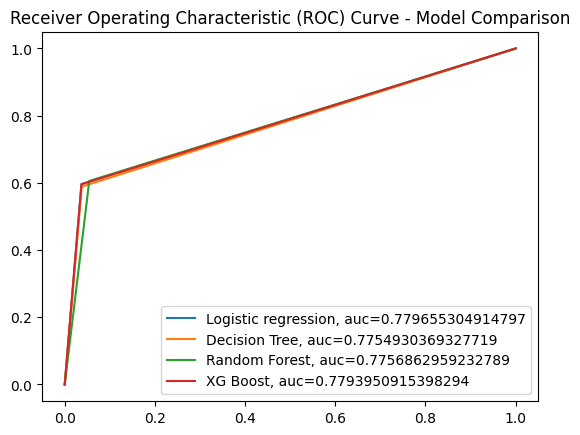

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

# pred = np.random.rand(1000)
# label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_log)
auc = metrics.roc_auc_score(y_test, y_pred_log)
plt.plot(fpr,tpr,label="Logistic regression, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_dct)
auc = metrics.roc_auc_score(y_test, y_pred_dct)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_rf)
auc = metrics.roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_xg)
auc = metrics.roc_auc_score(y_test, y_pred_xg)
plt.plot(fpr,tpr,label="XG Boost, auc="+str(auc))

plt.title('Receiver Operating Characteristic (ROC) Curve - Model Comparison', fontsize=12)

plt.legend(loc=0)

*   The ROC-AUC values reflect the classification performance of various models.
*   Logistic Regression stands out with the highest AUC of 0.77965, closely followed by the Decision Tree at 0.7785, demonstrating comparable discrimination capabilities.
*     Random Forest achieved a good AUC of 0.7458, indicating strong classification performance. XGBoost also performed well, with an AUC of 0.7790, which is similar to Logistic Regression.
*    These models exhibit competitive performance, with minimal differences in their ROC-AUC values, making them versatile for diverse classification tasks.

**Precision_Recall Curve**

  *   Since the classes are imbalanced, precision_recall curve is more approriate.

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

baseline_model = sum(y_test == 1) / len(y_test)

precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_xg, recall_xg, _ = precision_recall_curve(y_test, probs_xg)
auc_xg = auc(recall_xg, precision_xg)

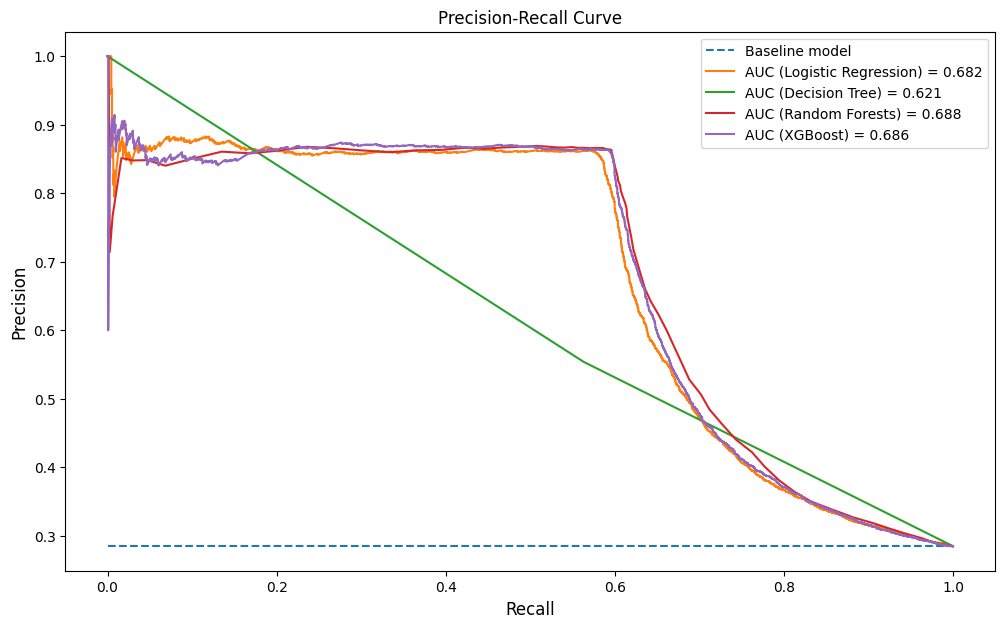

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.3f}')
plt.plot(recall_dt, precision_dt, label=f'AUC (Decision Tree) = {auc_dt:.3f}')
plt.plot(recall_rf, precision_rf, label=f'AUC (Random Forests) = {auc_rf:.3f}')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.3f}')
plt.title('Precision-Recall Curve', size=12)
plt.xlabel('Recall', size=12)
plt.ylabel('Precision', size=12)
plt.legend();

*   The Precision-Recall curves show that Logistic Regression, Random Forest, and XGBoost all achieve similar AUC values of around 0.68, implying comparable performance in precision and recall.
*    However, the Decision Tree lags slightly behind with an AUC of 0.618, indicating it may not perform as effectively in terms of precision and recall when contrasted with the other models.

*   Based upon all the metrics **'Logistic Regression'** seems to be better out of all the four models.


------------------------------------------------------------------------

# **Feature importance**

*   Performing feature importance to pinpoint the features with the most significant impact on predicting loan defaults.

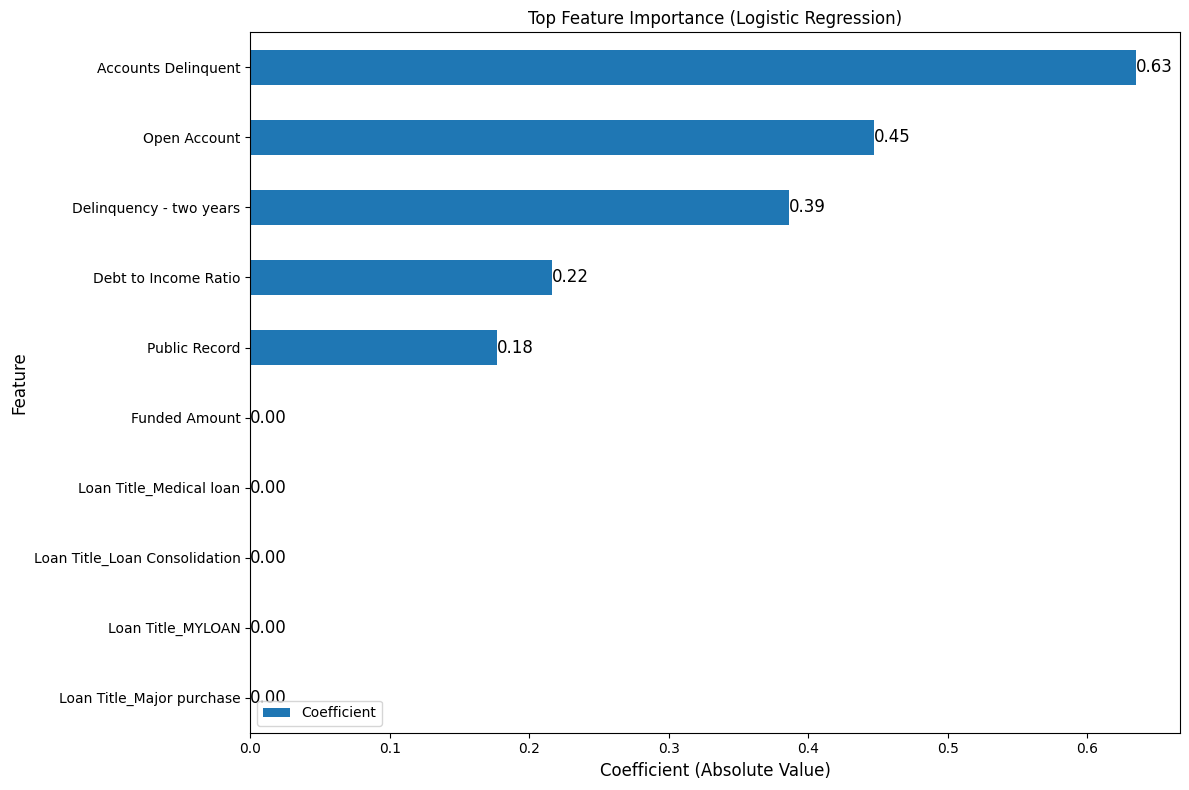

In [ ]:
# Extract the coefficients and feature names
coef = grid_search_log.best_estimator_.coef_[0]
feature_names = feature_cols

# Create a DataFrame to store feature names and their corresponding coefficients
fea_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
fea_df['Coefficient'] = fea_df['Coefficient'].abs()

fea_df = fea_df.sort_values(by='Coefficient', ascending=False)

figure, ax = plt.subplots(figsize=(12, 8))

top_n = 10
fea_df_top = fea_df.head(top_n)
fea_df_top.plot.barh(x='Feature', y='Coefficient', ax=ax)

for i, coef in enumerate(fea_df_top['Coefficient']):
    ax.text(coef, i, f'{coef:.2f}', va='center', color='black', fontsize=12)

ax.set_xlabel('Coefficient (Absolute Value)', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.title('Top Feature Importance (Logistic Regression)', fontsize=12)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

*   "Accounts Delinquent" and "Open Account" are the most important and they are the strongest predictors of loan default risk for Logistic Regression.

*   "Delinquency-two years" and "Debt to Income Ratio" are the subsequent influential features.

------------------------------------------------------------------------

**In summary:**

*   Logistic Regression and XGBoost stand out as strong performers in this context, boasting similar ROC-AUC scores and competitive accuracy.
*   Decision Tree also demonstrated respectable performance and offers the advantage of simplicity and interpretability.
*   Although Random Forest achieved a commendable ROC-AUC score, its accuracy is comparatively lower, suggesting that further fine-tuning may be beneficial.
*   The choice of the most suitable model should align with the specific objectives of the task. If the priority is to minimize false positives (maximize precision), Logistic Regression is a compelling choice.
*    Alternatively, for a more balanced approach, Decision Tree or XGBoost might be preferred.

**-----------------------------------------------------------------------**
**-----------------------------------------------------------------------**

In [ ]:
classifiers_tuned = [
    ('Logistic Regression', grid_search_log),
    ('Decision Tree', grid_search_dt),
    ('Random Forest', grid_search_rf),
    ('XGBoost', grid_search_xg)
]

for classifier_name, classifier in classifiers_tuned:
    start_time = time.time()
    classifier.fit(X_train_scaled_smote, y_train_smote)
    end_time = time.time()
    run_time = end_time - start_time
    print(f"{classifier_name} took {run_time:.2f} seconds to fit the hyper-tuned model.")

Logistic Regression took 133.91 seconds to fit the hyper-tuned model.
Decision Tree took 459.76 seconds to fit the hyper-tuned model.
Random Forest took 667.19 seconds to fit the hyper-tuned model.
XGBoost took 31.27 seconds to fit the hyper-tuned model.


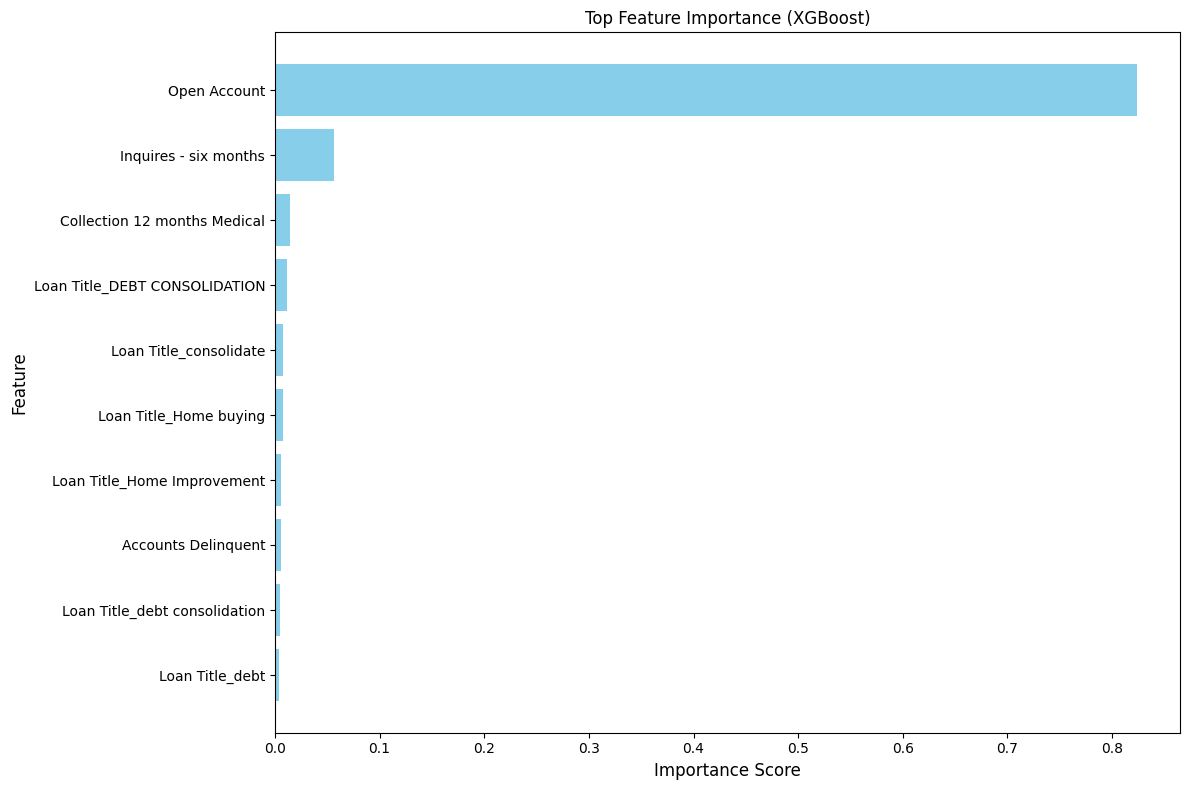

In [ ]:
# Extract feature importance scores from the XGBoost model
feature_importance = grid_search_xg.best_estimator_.feature_importances_

# Associate the feature names with their importance scores
feature_names = feature_cols

# Create a DataFrame to store feature names and their corresponding importance scores
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Select the top N most important features to display
top_n = 10
feature_df_top = feature_df.head(top_n)

# Create a horizontal bar plot to visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_df_top['Feature'], feature_df_top['Importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top Feature Importance (XGBoost)', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
